In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
from scipy.optimize import curve_fit
import math 
from scipy.stats import binom
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import beta
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats



In [4]:
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')

In [5]:
# df['day']= df['date'].ne(df['date'].shift()).cumsum()

In [6]:
df['day']= df['date'].ne(df['date'].shift()).cumsum()
#df['diff_cont'] = df.groupby(['day','session'],group_keys=True)['contingency']

# for ix in range(len(df)):
#     if df.loc[ix,'trial']<60:
#         df.loc[ix,'cont_num']=1
#     elif df.loc[ix,'trial']>119:
#         df.loc[ix,'cont_num']=3
#     else:
#         df.loc[ix,'cont_num'] =2

#df['diff_cont'] = df.

df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())


df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
del df['diff_cont']
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift()).cumsum()

df['day_chng'] = df['day'].ne(df['day'].shift())
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
for ix in range(len(df)):
    if df.loc[ix,'trial']==0:
        df.loc[ix,'stem_switch']= True
df['bout_num'] = df['stem'].ne(df['stem'].shift()).cumsum()



# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
df['sess_chng'] = df['session'].ne(df['session'].shift()).cumsum()
obj = ['day', 'session', 'stem']

df['rew_count_session'] = df.groupby(obj)[['reward']].cumsum()
# obj1 = ['day', 'session', 'stem','cont_num']
# df[]
df[0:5]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,bout_num,glob_nom_avg,sess_chng,rew_count_session
0,0,4,B,1,805020202050,20201028,1,0,1,1,1,True,True,1,40.0,1,1
1,1,1,A,0,805020202050,20201028,1,1,1,1,1,False,True,2,40.0,1,0
2,2,2,A,0,805020202050,20201028,1,2,1,1,1,False,False,2,40.0,1,0
3,3,3,B,1,805020202050,20201028,1,3,1,1,1,False,True,3,40.0,1,2
4,4,4,B,0,805020202050,20201028,1,4,1,1,1,False,False,3,40.0,1,2


In [7]:
df['stem_switch']

0         True
1         True
2        False
3         True
4        False
         ...  
13288    False
13289    False
13290    False
13291    False
13292    False
Name: stem_switch, Length: 13293, dtype: bool

In [8]:
#maybe first thing I should do is 
#first thing I want to do is recreate- how much reward does rat get per session? What if split into each contingency? 

In [9]:
dist_lst=[]
for ix in range(len(df)):
    if ix < len(df)-1:
        if df.iloc[ix]['stem'] == df.iloc[ix+1]['stem']:
            dist_lst.append(2)
        else:
            dist_lst.append(4)
    else:
        dist_lst.append(0)
df['dist']=dist_lst      
obj = ['day', 'session','cont_num']
df['dist_traveled'] = df.groupby(obj)[['dist']].cumsum()

In [10]:
df_choice = pd.DataFrame()
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
for cont in range(1,df['new_cont'].max()+1):
    cont_num= (df[df['new_cont']==cont]['cont_num'].max())
    day_num= (df[df['new_cont']==cont]['day'].max())
    session_num= (df[df['new_cont']==cont]['session'].max())
    cont_vals = (df[df['new_cont']==cont]['contingency'].max())
#     glob_avg= (df[df['new_cont']==cont]['glob_nom_avg'].max())
    num_rew= (df[df['new_cont']==cont]['reward'].sum())
    stem_switch = (df[df['new_cont']==cont]['stem_switch'].sum())
    dist = (df[df['new_cont']==cont]['dist_traveled'].max())
#     df_choice.loc[cont,'num_a'] = num_a
#     df_choice.loc[cont,'num_b'] = num_b
#     df_choice.loc[cont,'num_c'] = num_c
#     df_choice.loc[cont, 'best_exp_stem'] = best_exp_stem
    #df_choice.loc[cont, 'prop_at_best'] = prop_at_best
    df_choice.loc[cont,'cont_num'] = cont_num
    df_choice.loc[cont,'day'] = day_num
    df_choice.loc[cont,'session'] = session_num
    df_choice.loc[cont,'contingency'] = cont_vals
    df_choice.loc[cont,'stem_switch']= stem_switch
    df_choice.loc[cont,'dist'] = dist
#     df_choice.loc[cont,'glob_nom_avg'] = glob_avg
    df_choice.loc[cont,'num_rew'] = num_rew
df_choice['day_chng'] = df_choice['day'].ne(df_choice['day'].shift())

df_choice['cont_chng'] = df_choice['contingency'].ne(df_choice['contingency'].shift())
df_choice['session_chng'] = df_choice['session'].ne(df_choice['session'].shift())
df_choice

,cont_num,day,session,contingency,stem_switch,dist,num_rew,day_chng,cont_chng,session_chng
1,1.0,1.0,1.0,8.050202e+11,15.0,148.0,25.0,True,True,True
2,2.0,1.0,1.0,2.020502e+11,7.0,134.0,24.0,False,True,False
3,3.0,1.0,1.0,2.080508e+11,4.0,130.0,30.0,False,True,False
4,1.0,1.0,2.0,5.020208e+11,16.0,150.0,27.0,False,True,True
5,2.0,1.0,2.0,5.050502e+11,7.0,134.0,22.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...
218,2.0,11.0,5.0,2.020208e+11,1.0,122.0,40.0,False,True,False
219,3.0,11.0,5.0,5.050202e+11,3.0,128.0,23.0,False,True,False
220,1.0,11.0,6.0,2.020205e+11,3.0,124.0,37.0,False,True,True
221,2.0,11.0,6.0,5.020805e+11,1.0,122.0,34.0,False,True,False


In [11]:
rewards_per_cont = []
dist_per_cont = []
for cont in range(1,df['new_cont'].max()+1):
    num_rew= (df[df['new_cont']==cont]['reward'].sum())
    rewards_per_cont.append(num_rew)  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.861
Date:                Tue, 26 Oct 2021   Prob (F-statistic):              0.177
Time:                        15:10:49   Log-Likelihood:                 116.04
No. Observations:                  74   AIC:                            -228.1
Df Residuals:                      72   BIC:                            -223.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2179      0.012     18.393      0.0

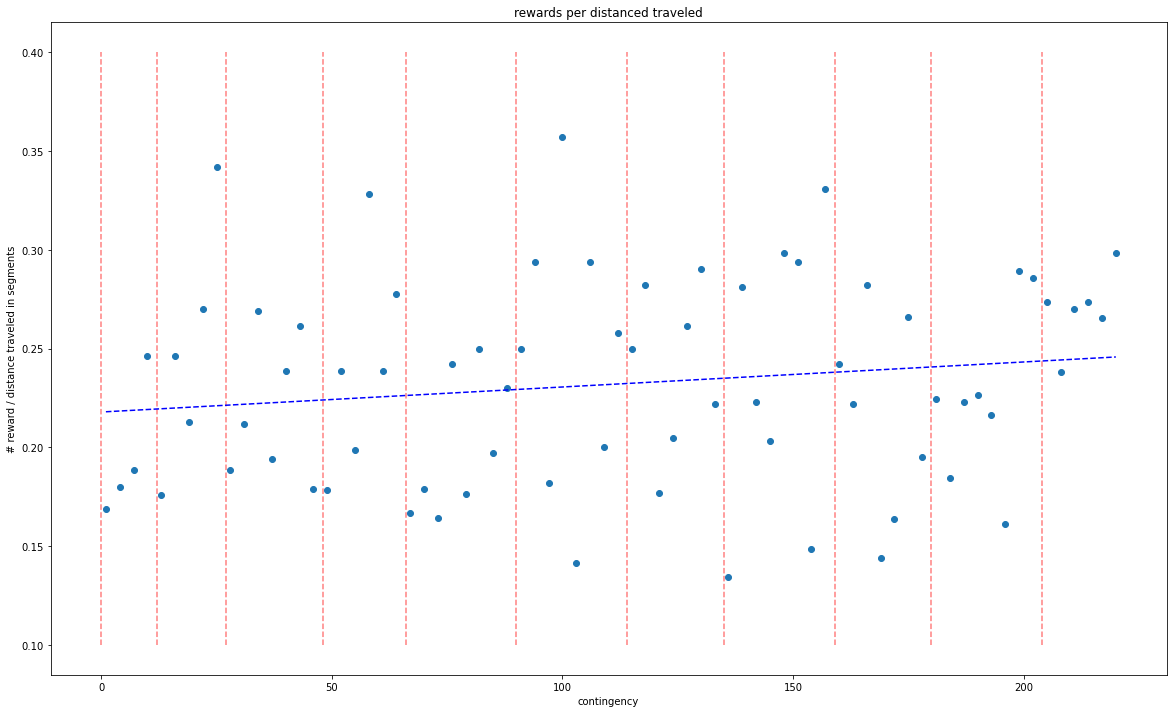

In [12]:
rew_per_dis = df_choice.num_rew / df_choice.dist
rew_per_dis_first = rew_per_dis[0::3]
plt.figure(figsize=(20,12))
plt.scatter(rew_per_dis_first.index,rew_per_dis_first)
x=rew_per_dis_first.index
y=rew_per_dis_first
plt.vlines((df_choice[df_choice['day_chng']].index-1),.1,.4,colors='red', ls='--',alpha=0.5)
plt.title('rewards per distanced traveled') #per first contingency')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.xlabel('contingency')
plt.ylabel('# reward / distance traveled in segments')
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

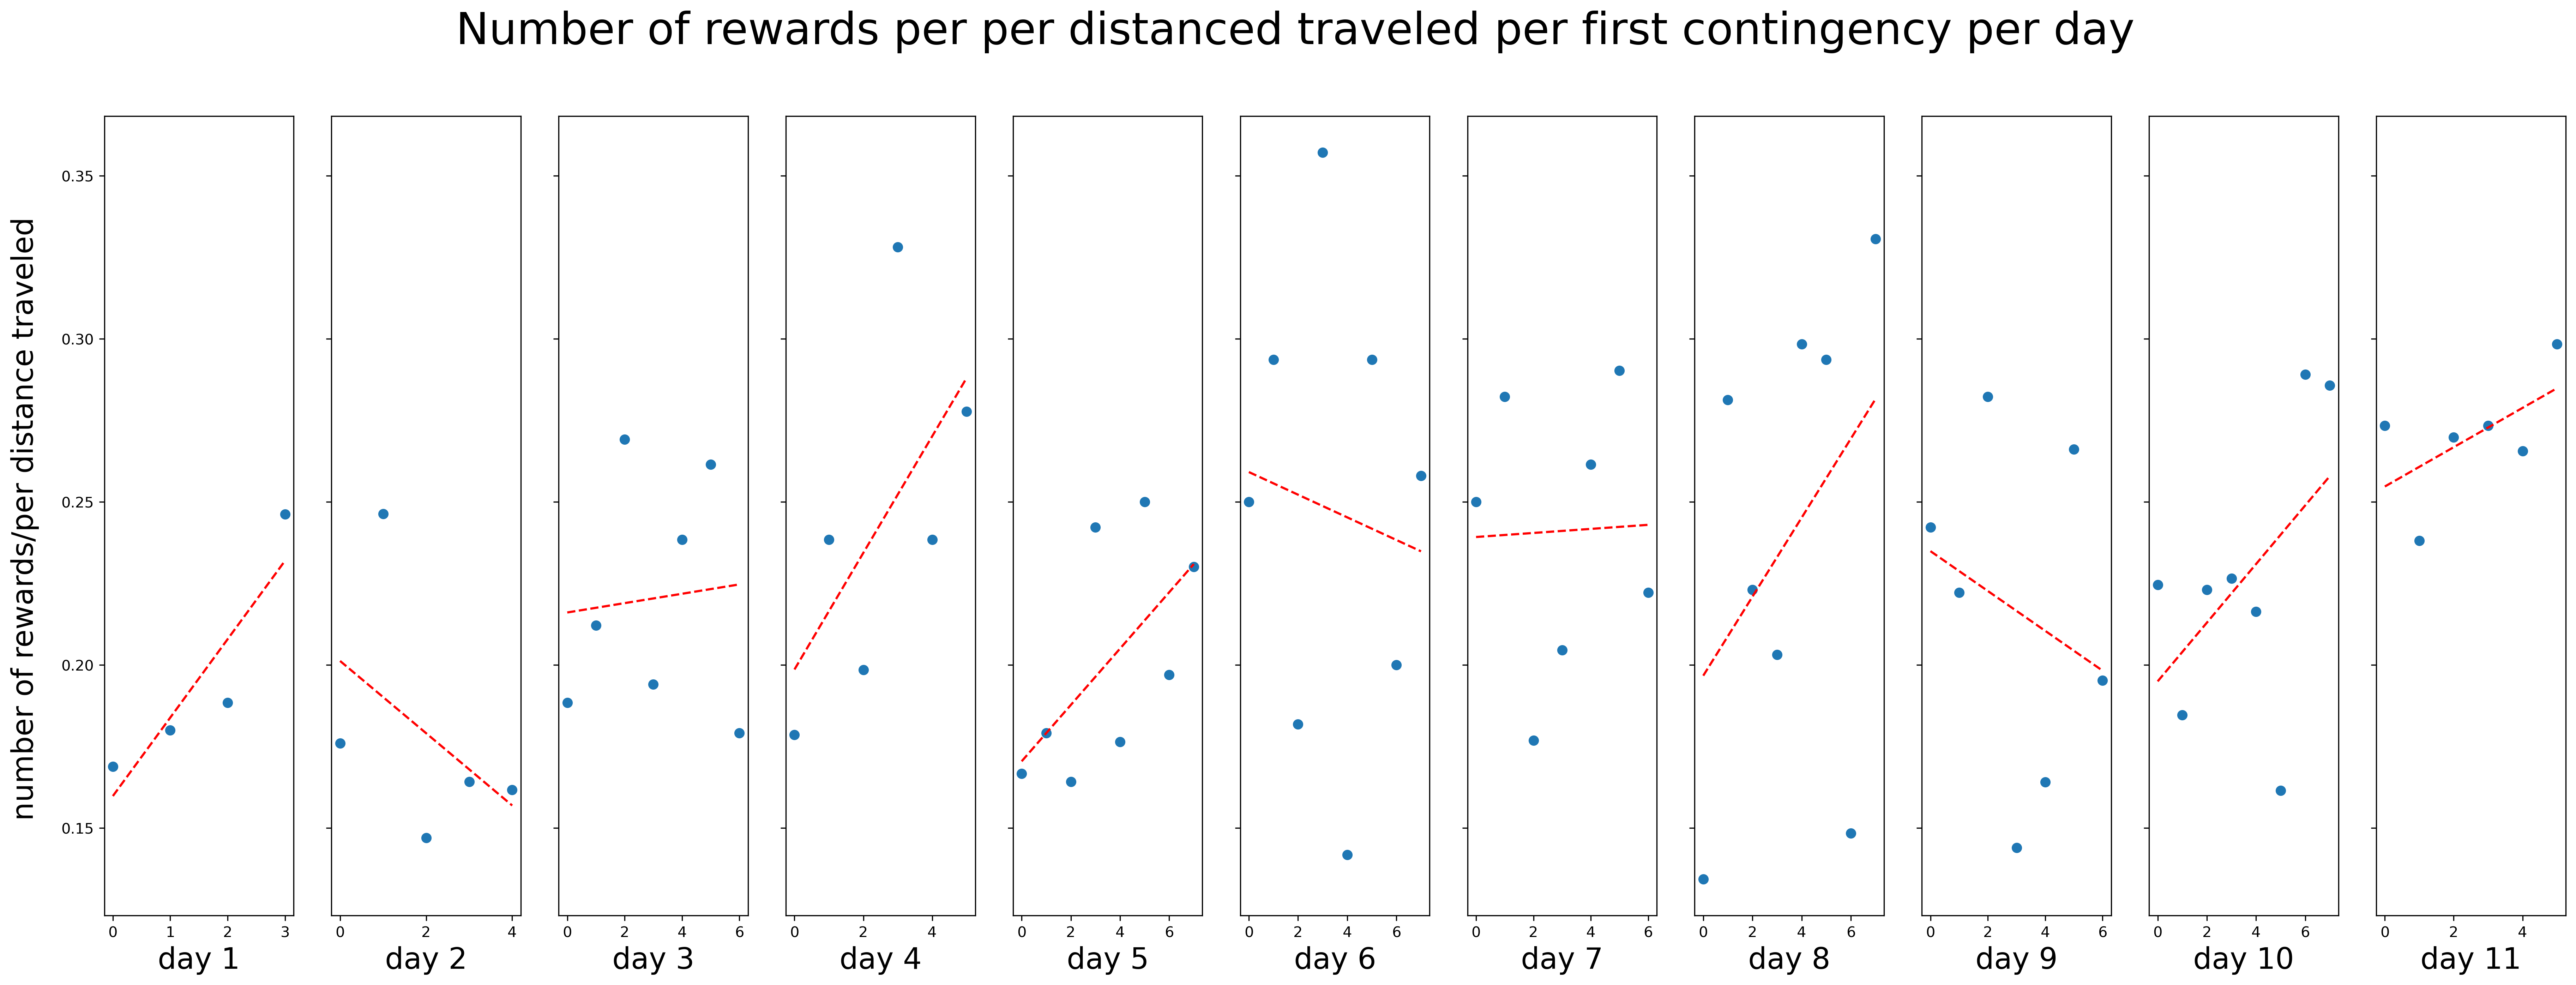

In [13]:
fig,ax = plt.subplots(1, 11,figsize=(30, 10), dpi=300, sharey=True)
fig.suptitle('Number of rewards per per distanced traveled per first contingency per day', fontsize=30)
#fig.ylabel()
#ax.set_ylabel('number of rewards')
fig.text(.1, 0.5, 'number of rewards/per distance traveled', ha='center', va='center', rotation='vertical',fontsize=20)
for day in range(1,12):
    day_df= df_choice[df_choice.day==day]
    day_df = day_df[day_df.cont_num==1]
    x=range(len(day_df))
    y=day_df.num_rew/day_df.dist
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[day-1].scatter(x,y)
    ax[day-1].plot(x,p(x),"r--")
    ax[day-1].set_xlabel(f'day {day}',fontsize=20)
    #print(x,y)
    #plt.figure()
    

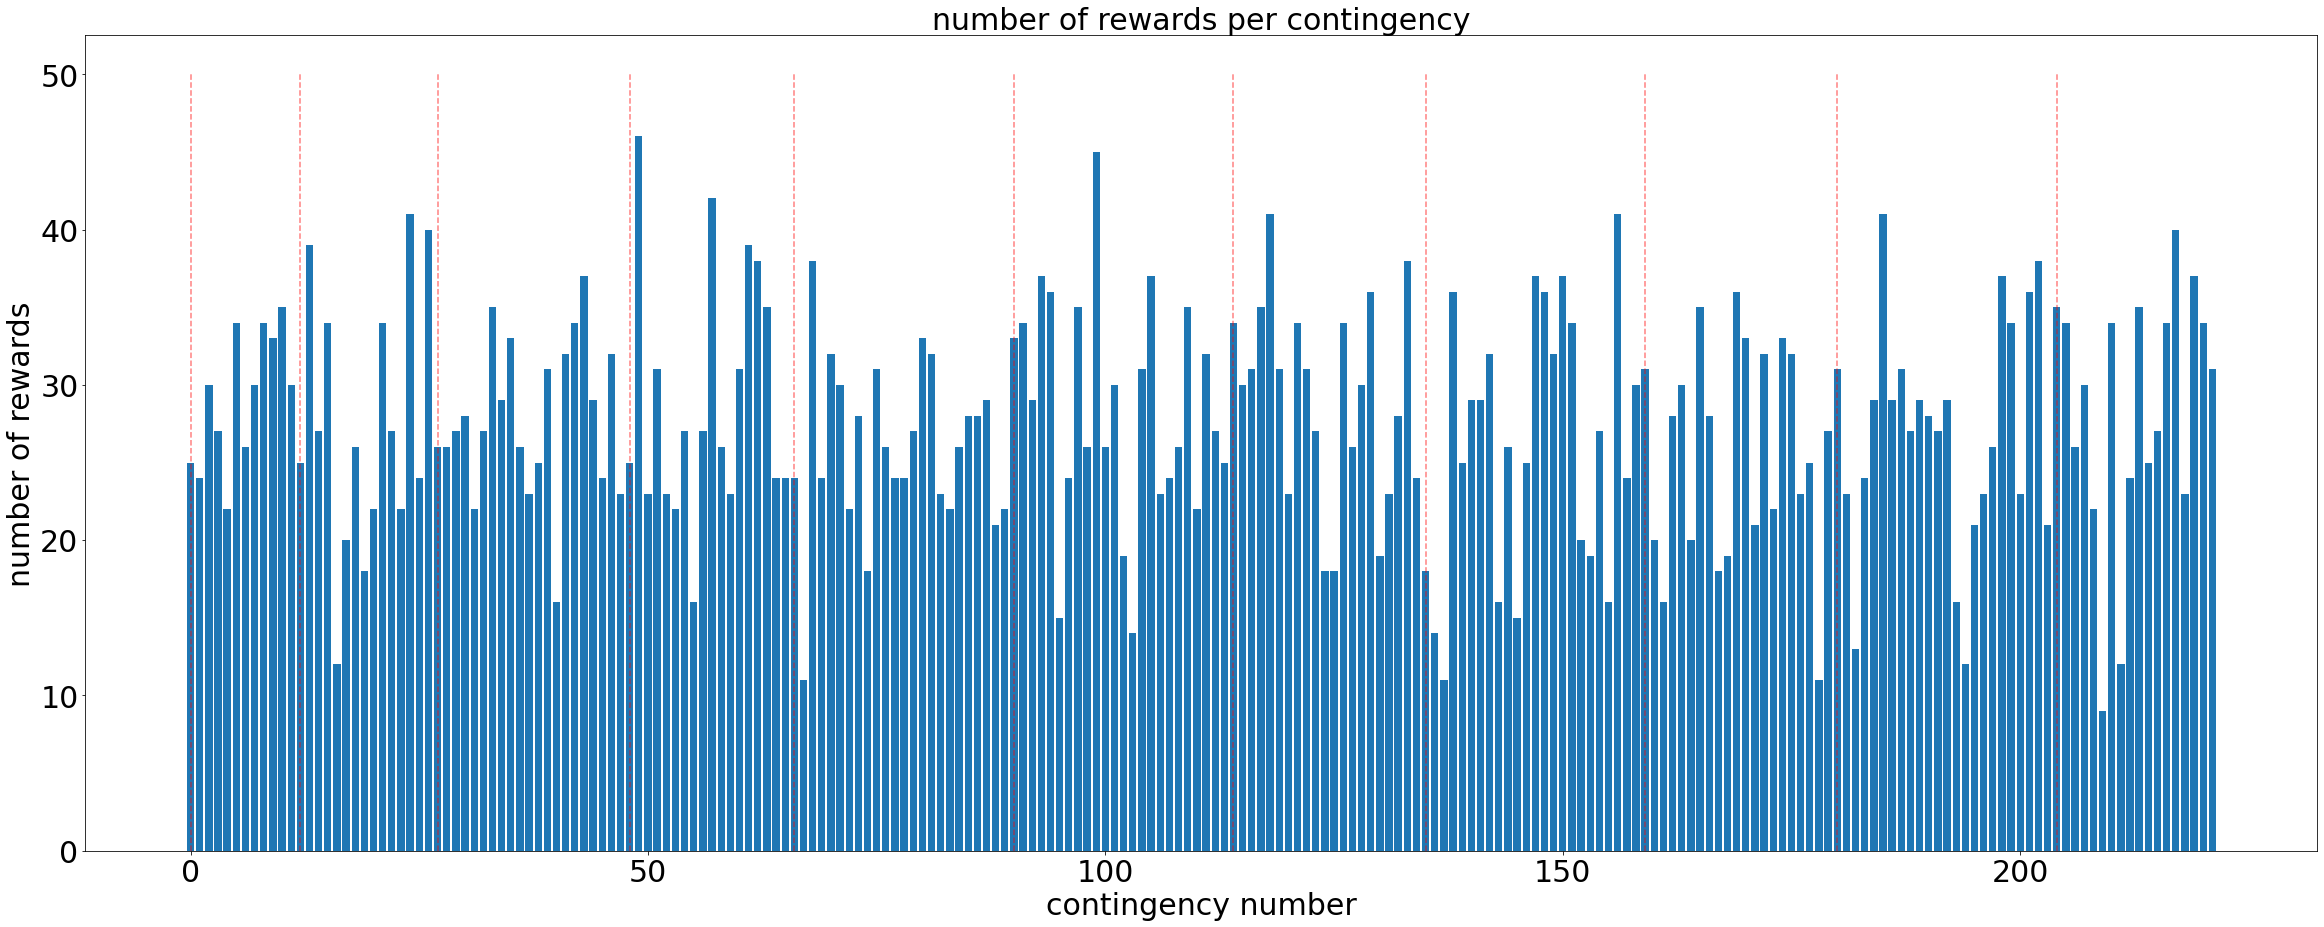

In [14]:
plt.figure(figsize=(40,15))
y= rewards_per_cont
x= range(len(rewards_per_cont))
plt.bar(x,y)
#"plt.title('number of rewards per contingency',fontsize=30)
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number of rewards',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('number of rewards per contingency',fontsize=30)
plt.vlines(df_choice[df_choice['day_chng']].index-1,0,50,colors='red', ls='--',alpha=0.5)


([<matplotlib.axis.YTick at 0x7f69c95fed00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

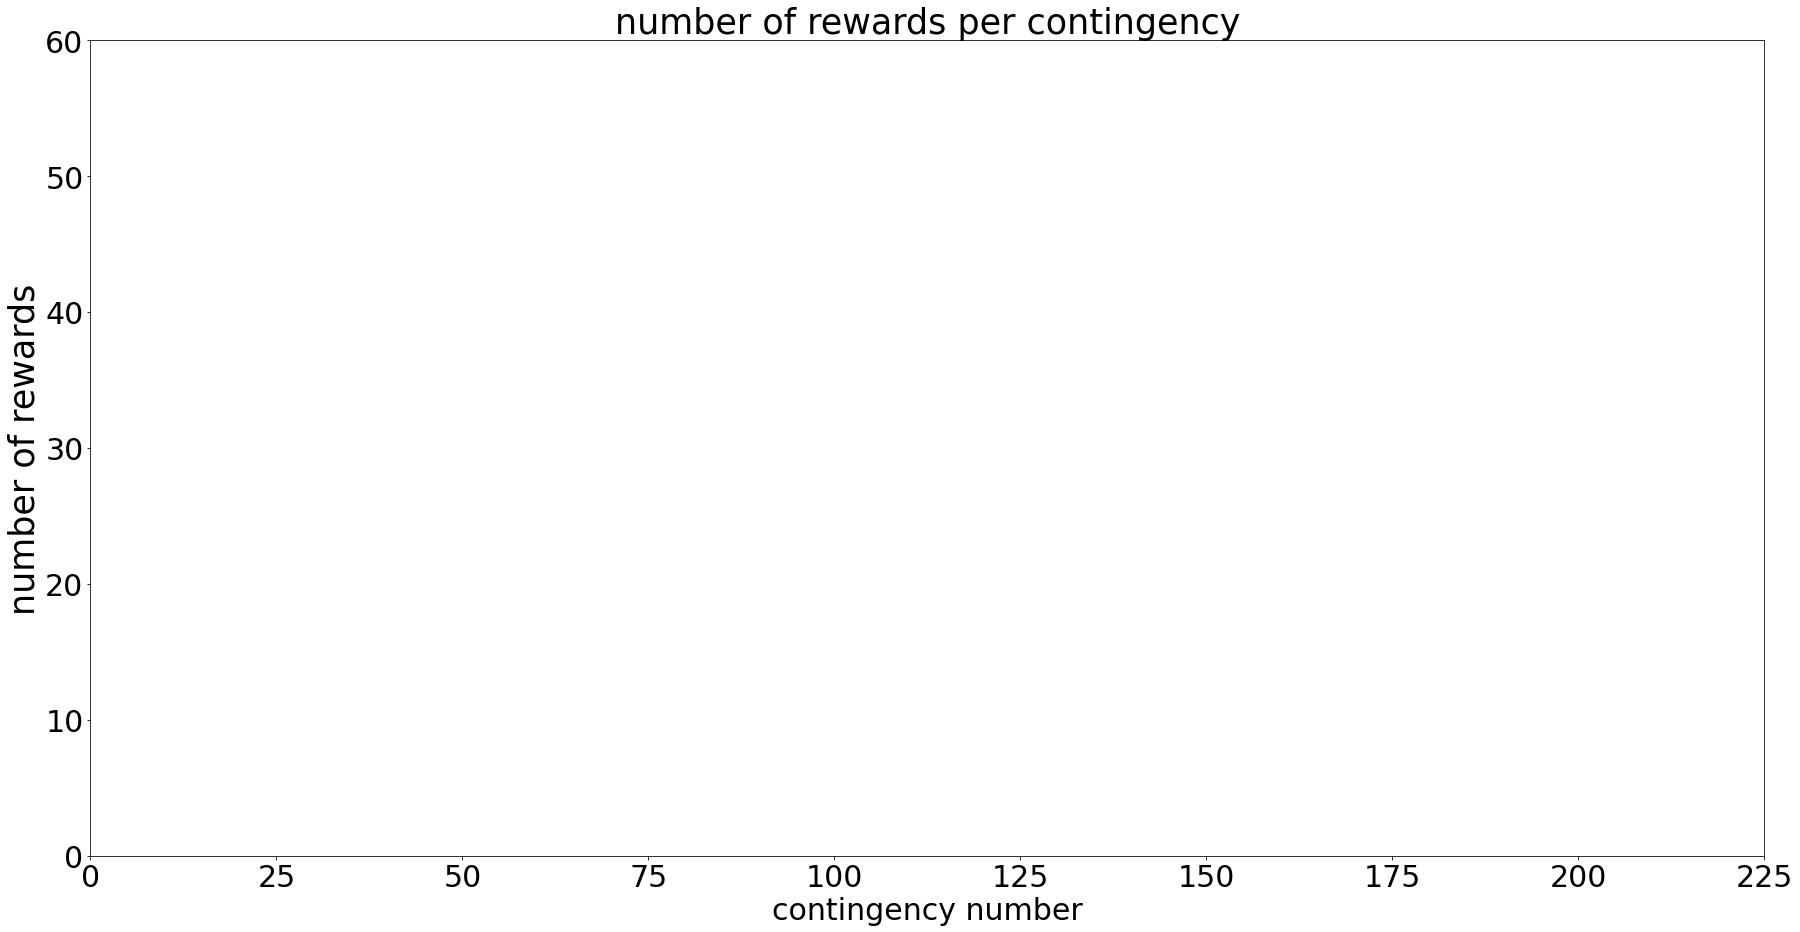

In [15]:
plt.figure(figsize=(30,15))
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number of rewards',fontsize=35)
plt.title('number of rewards per contingency',fontsize=35)
plt.xticks(np.arange(0, 250, step=25),fontsize=30)
plt.yticks(np.arange(0, 70, step=10),fontsize=30)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4523
Date:                Tue, 26 Oct 2021   Prob (F-statistic):              0.502
Time:                        15:10:51   Log-Likelihood:                -748.88
No. Observations:                 222   AIC:                             1502.
Df Residuals:                     220   BIC:                             1509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1015      0.949     29.621      0.0

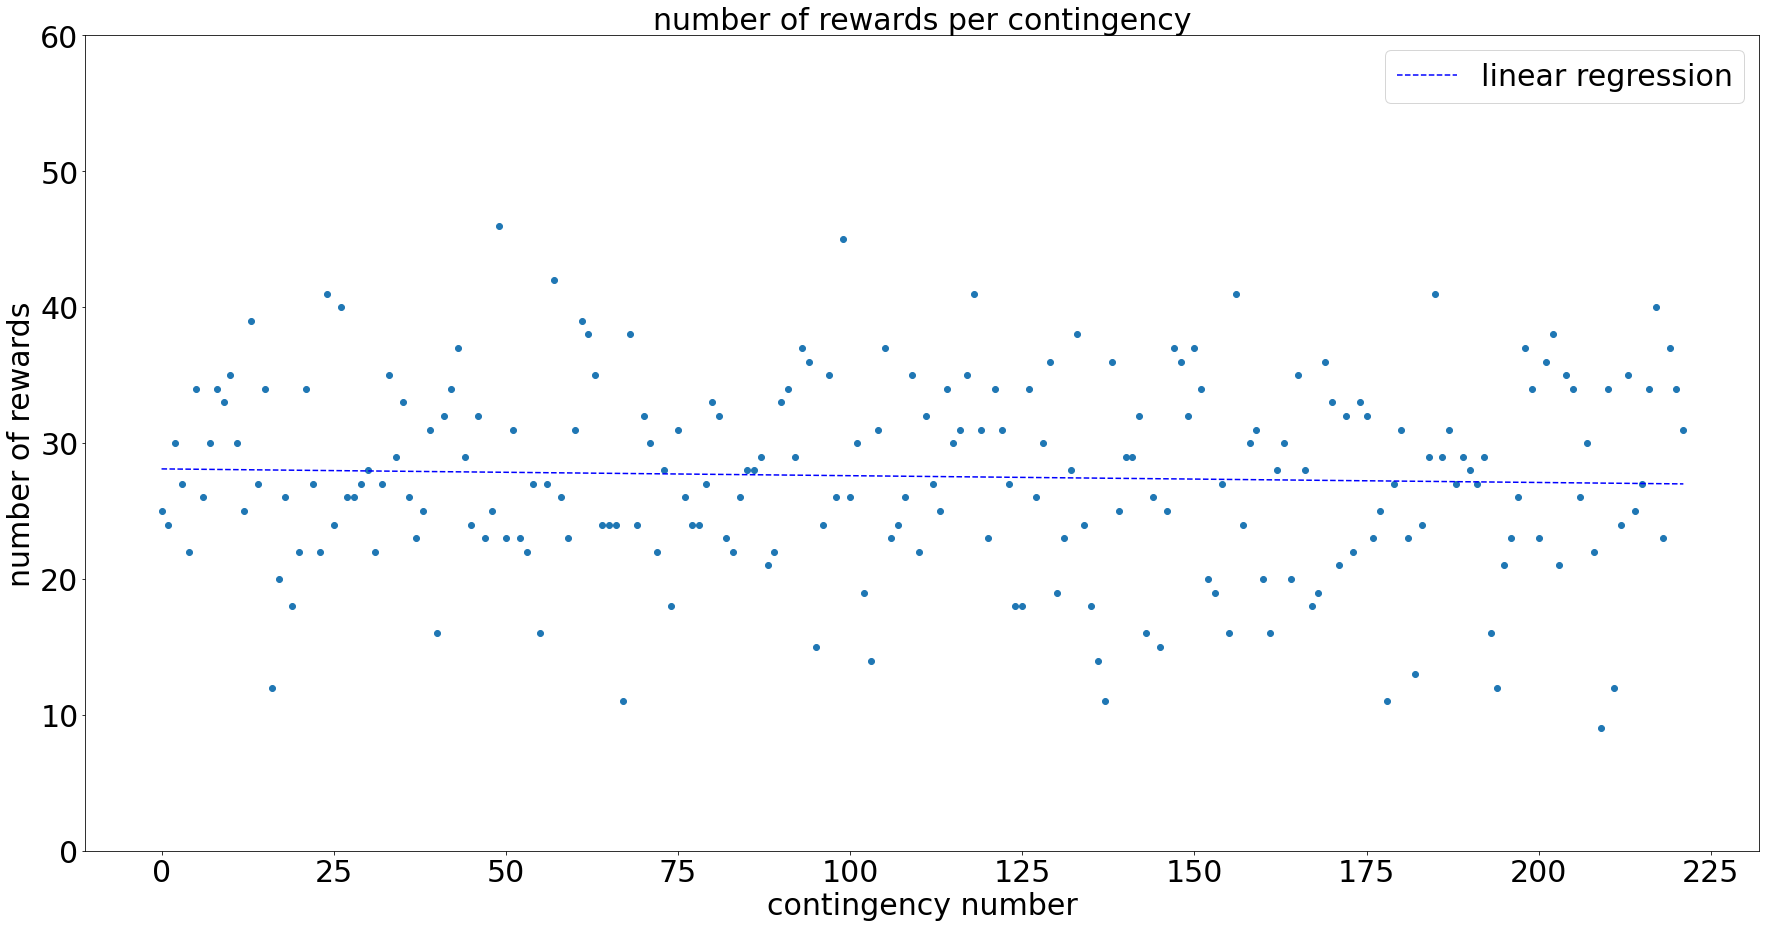

In [16]:

    
plt.figure(figsize=(30,15))
y= rewards_per_cont
x= range(len(rewards_per_cont))
# X2 = sm.add_constant(x)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())
df1 = pd.DataFrame(
    {'x': x,
     'y': y}
)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--",label='linear regression')
xmean = np.mean(x)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
df1['xvar'] = (df1['x'] - xmean)**2

# Calculate beta and alpha
# #beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line


plt.scatter(x,y)
#plt.vlines(df_choice[df_choice['day_chng']].index-1,0,60,colors='red', ls='--',alpha=0.5,label='day')
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number of rewards',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(np.arange(0, 250, step=25),fontsize=30)
plt.yticks(np.arange(0, 70, step=10),fontsize=30)
plt.title('number of rewards per contingency',fontsize=30)
plt.legend(loc ="upper right",fontsize=30)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

[]

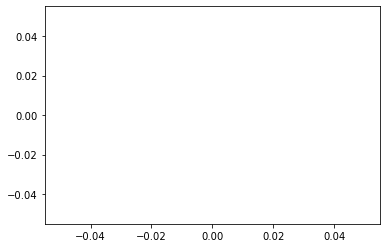

In [17]:
plt.plot()

In [1]:
stem_s_per_cont = []
for cont in range(1,df['new_cont'].max()+1):
    stem_s= (df[df['new_cont']==cont]['stem_switch'].sum())
    stem_s_per_cont.append(stem_s)  
#stem_s_per_cont

NameError: name 'df' is not defined

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     23.79
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           2.06e-06
Time:                        15:10:52   Log-Likelihood:                -530.70
No. Observations:                 222   AIC:                             1065.
Df Residuals:                     220   BIC:                             1072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1648      0.355     14.546      0.0

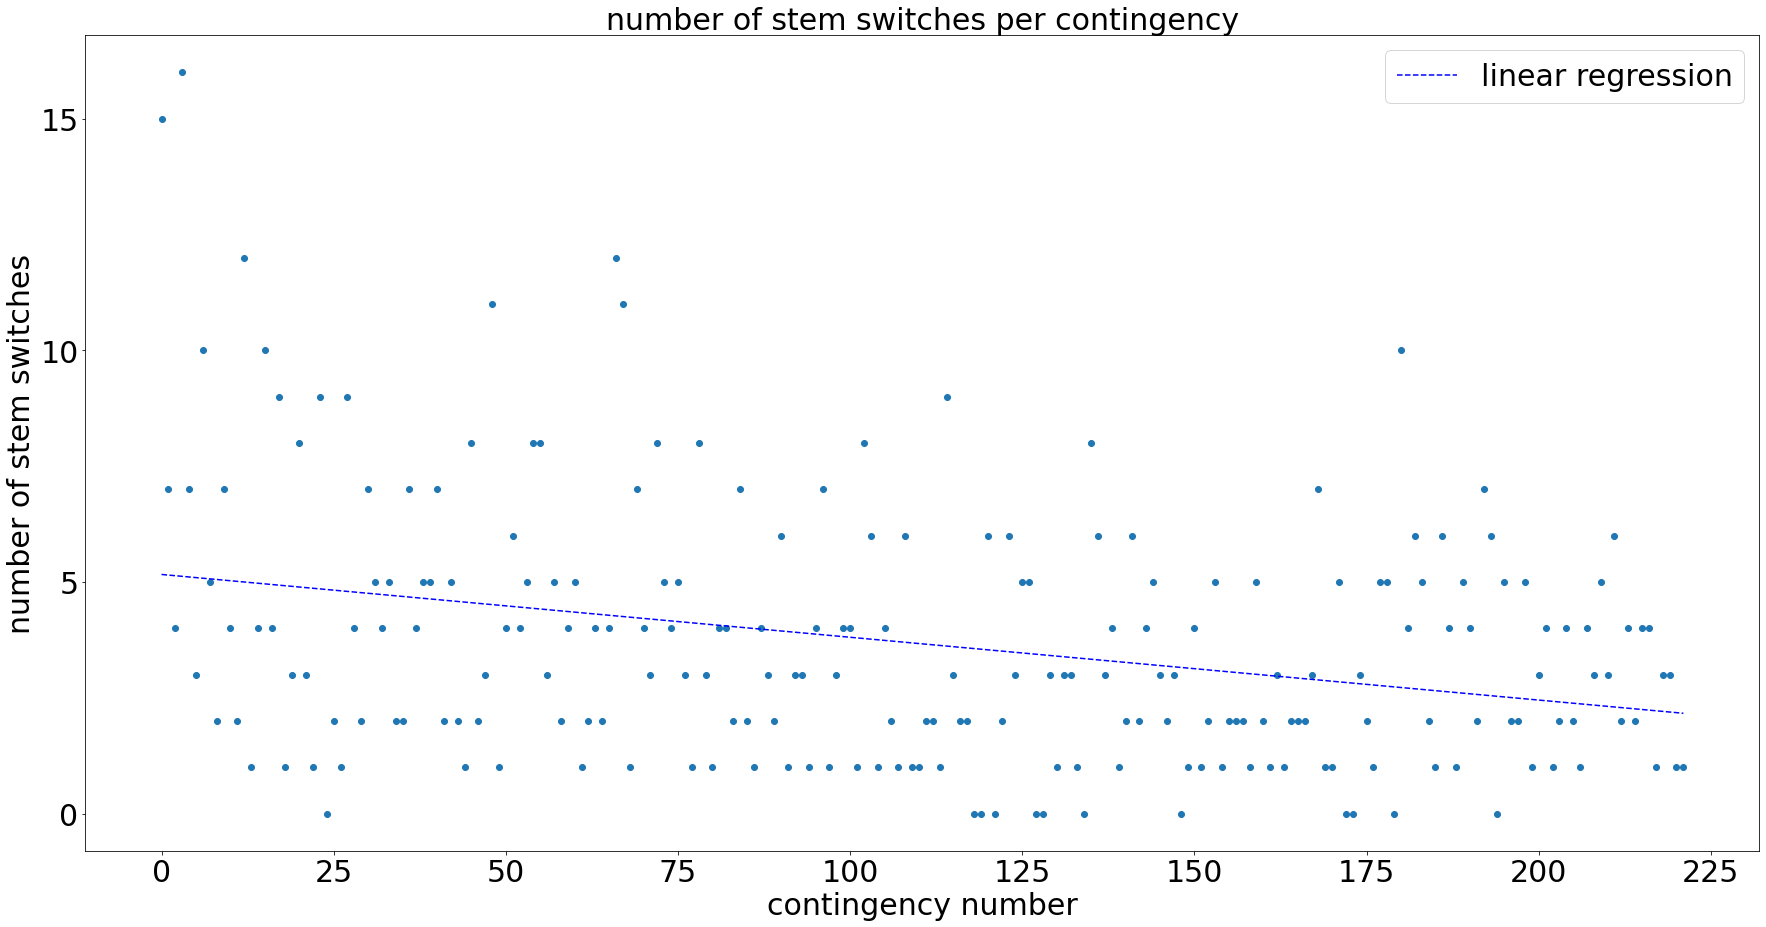

In [19]:

plt.figure(figsize=(30,15))
y= stem_s_per_cont
x= range(len(stem_s_per_cont))
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
df1 = pd.DataFrame(
    {'x': x,
     'y': y}
)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--",label='linear regression')
xmean = np.mean(x)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
df1['xvar'] = (df1['x'] - xmean)**2

# Calculate beta and alpha
# #beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line


plt.scatter(x,y)
#plt.vlines(df_choice[df_choice['day_chng']].index-1,0,15,colors='red', ls='--',alpha=0.5,label='day')
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number of stem switches',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(np.arange(0, 250, step=25),fontsize=30)
plt.yticks(np.arange(0, 20, step=5),fontsize=30)
plt.title('number of stem switches per contingency',fontsize=30)
plt.legend(loc ="upper right",fontsize=30)

<ipython-input-20-5b3aef8af7ee>:5: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-x*k) + b


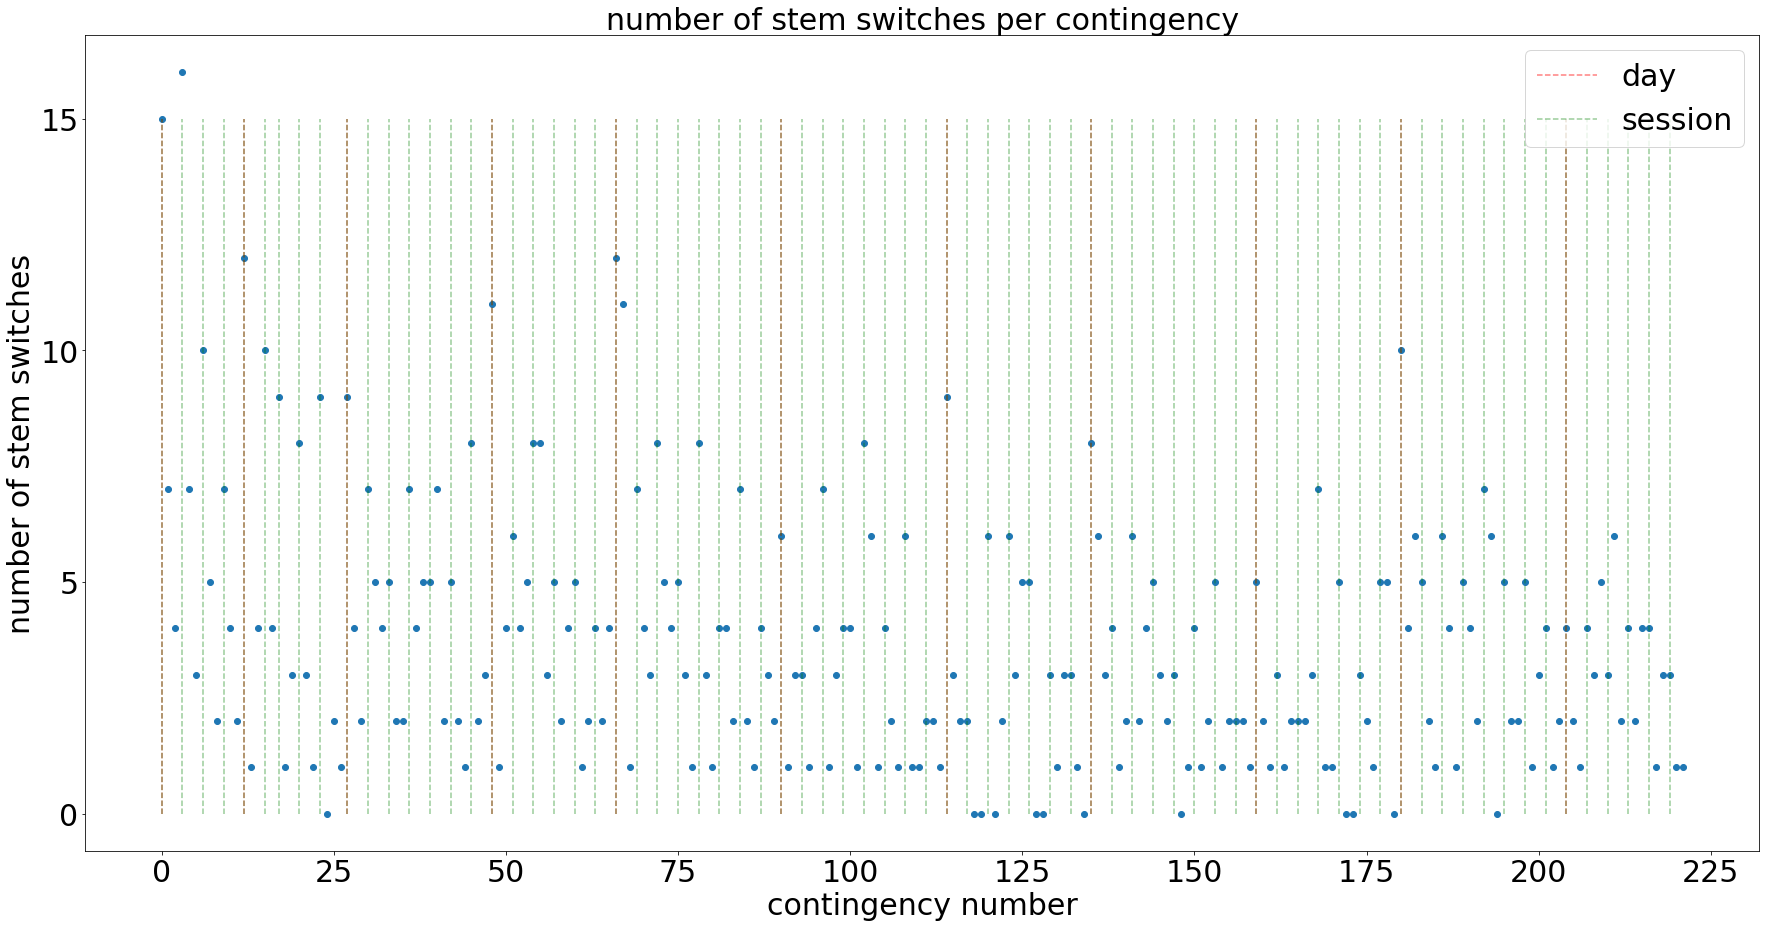

In [20]:

from scipy.optimize import curve_fit 
import scipy as scipy
from scipy import optimize
def exponential(x, a, k, b):
    return a*np.exp(-x*k) + b
plt.figure(figsize=(30,15))


y=np.array(stem_s_per_cont)
X = np.array(range(len(stem_s_per_cont)))


popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, X, y, p0=None)
#plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)
#plt.plot(X, exponential(X, *popt_exponential), 'k--')# \
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))
plt.scatter(x,y)
y= stem_s_per_cont
x= range(len(stem_s_per_cont))
plt.vlines(df_choice[df_choice['day_chng']].index-1,0,15,colors='red', ls='--',alpha=0.5,label='day')
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number of stem switches',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(np.arange(0, 250, step=25),fontsize=30)
plt.yticks(np.arange(0, 20, step=5),fontsize=30)
plt.title('number of stem switches per contingency',fontsize=30)
plt.vlines(df_choice[df_choice['session_chng']].index-1,0,15,colors='green', ls='--',alpha=0.4,label='session')


plt.legend(loc ="upper right",fontsize=30)

In [21]:
# import numpy as np
# from scipy.optimize import curve_fit
# def func(x, a, b, c):
#      return a*np.exp(-b*x) + c
# y= np.array(stem_s_per_cont)
# x= range(len(stem_s_per_cont))
    
# #x = np.linspace(0,4,50)
# #y = func(x, 2.5, 1.3, 0.5)
# yn = y + 0.2*np.random.normal(size=len(x))

# popt, pcov = curve_fit(func, x, yn)

In [22]:
# #y= stem_s_per_cont
# x= range(len(stem_s_per_cont))
# #x = numpy.array([1, 7, 20, 50, 79])
# y = np.array(stem_s_per_cont)
# fit = np.polyfit(x, np.log(y), 1)#array([ 8.46295607,  6.61867463])
# # y ≈ 8.46 log(x) + 6.62



# # def func(x, a, b, c):
# #     return a * np.exp(-b * x) + c

# # y = func(x, 2.5, 1.3, 0.5)
# # yn = y + 0.2*np.random.normal(size=len(x))

# # popt, pcov = curve_fit(func, x, yn)

In [23]:
#  8.46295607,  6.61867463
# coef1 = np.polyfit(x, np.log(y), 1)
# poly = np.poly1d(coef1)
# poly
# #plot(x,poly);

In [24]:
df_choice 

,cont_num,day,session,contingency,stem_switch,dist,num_rew,day_chng,cont_chng,session_chng
1,1.0,1.0,1.0,8.050202e+11,15.0,148.0,25.0,True,True,True
2,2.0,1.0,1.0,2.020502e+11,7.0,134.0,24.0,False,True,False
3,3.0,1.0,1.0,2.080508e+11,4.0,130.0,30.0,False,True,False
4,1.0,1.0,2.0,5.020208e+11,16.0,150.0,27.0,False,True,True
5,2.0,1.0,2.0,5.050502e+11,7.0,134.0,22.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...
218,2.0,11.0,5.0,2.020208e+11,1.0,122.0,40.0,False,True,False
219,3.0,11.0,5.0,5.050202e+11,3.0,128.0,23.0,False,True,False
220,1.0,11.0,6.0,2.020205e+11,3.0,124.0,37.0,False,True,True
221,2.0,11.0,6.0,5.020805e+11,1.0,122.0,34.0,False,True,False


In [25]:
#should split up df_choice by day. 

In [26]:
# plt.figure(figsize=(25,15))
# y= rewards_per_cont
# x= range(len(rewards_per_cont))
# plt.plot(x,y,'o')
# # calc the trendline
# z = np.polyfit(x, y, 1)
# p = np.poly1d(z)
# plt.plot(x,p(x),"r--")
# plt.title('rewards per contingency')
# # the line equation:
# #print "y=%.6fx+(%.6f)"%(z[0],z[1])

In [27]:
#this will make an individual plot for each day


# # fig, ax = plt.subplots(1,11, figsize=(28, 40), dpi=300, sharex=True, sharey=True, )
# for day in range(1,12):
#     day_df= df_choice[df_choice.day==day]
#     x=range(len(day_df))
#     y=day_df.num_rew
    
#     #print(x,y)
#     plt.figure()
#     plt.scatter(x,y)
#     z = np.polyfit(x, y, 1)
#     p = np.poly1d(z)
#     plt.plot(x,p(x),"r--")
#     plt.ylim(10,45)
# # plt.plot(x,y,'o')
# # # calc the trendline
# # z = np.polyfit(x, y, 1)
# # p = np.poly1d(z)
# # plt.plot(x,p(x),"r--")


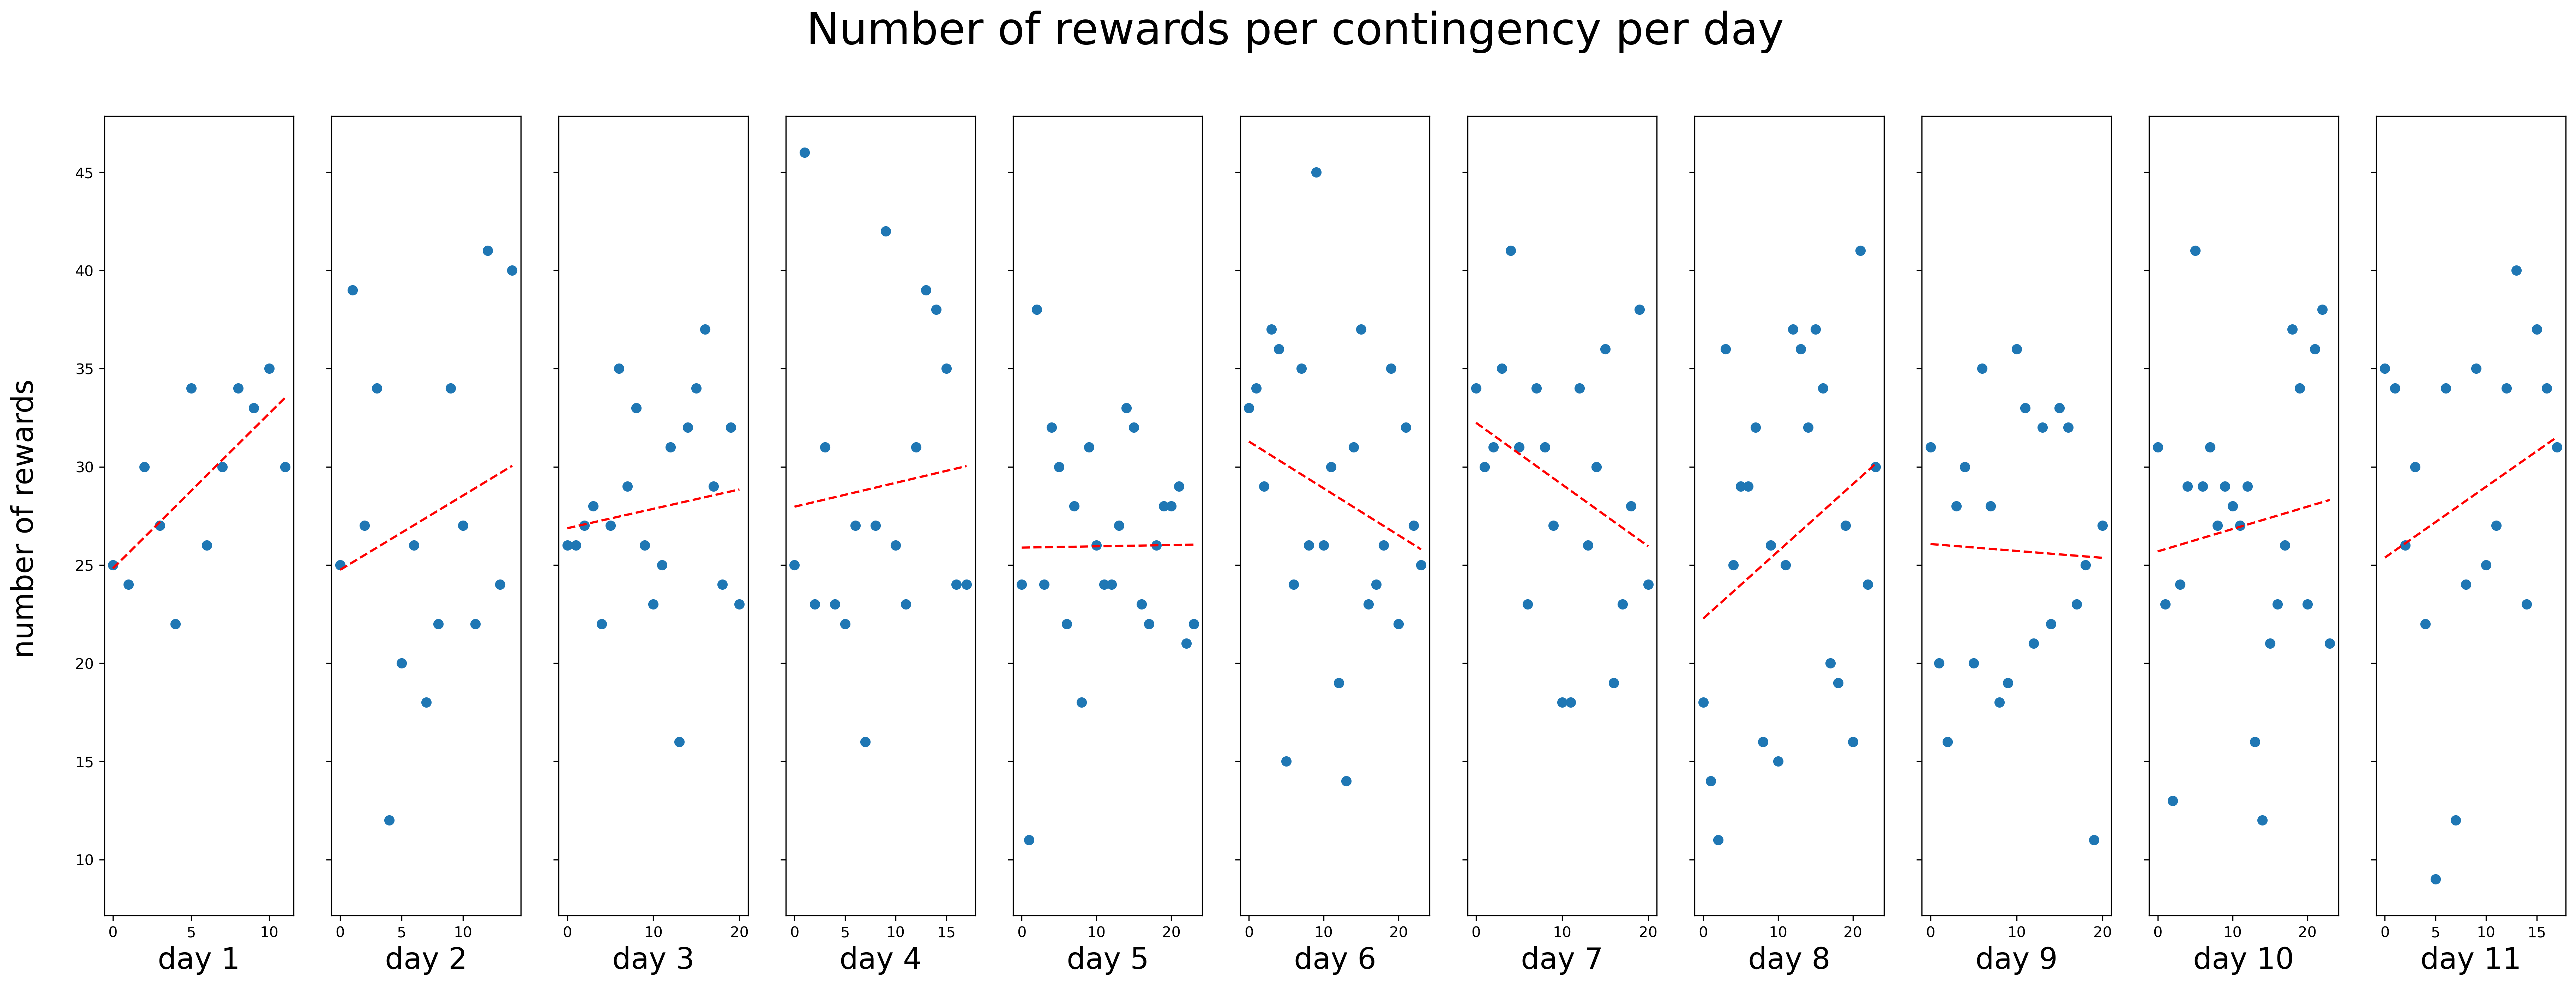

In [28]:
fig,ax = plt.subplots(1, 11,figsize=(30, 10), dpi=300, sharey=True)
fig.suptitle('Number of rewards per contingency per day', fontsize=30)
#fig.ylabel()
#ax.set_ylabel('number of rewards')
fig.text(.1, 0.5, 'number of rewards', ha='center', va='center', rotation='vertical',fontsize=20)
for day in range(1,12):
    day_df= df_choice[df_choice.day==day]
    x=range(len(day_df))
    y=day_df.num_rew
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[day-1].scatter(x,y)
    ax[day-1].plot(x,p(x),"r--")
    ax[day-1].set_xlabel(f'day {day}',fontsize=20)
    #print(x,y)
    #plt.figure()
    

In [29]:
df_choice_first_cont = df_choice[df_choice.cont_num==1]

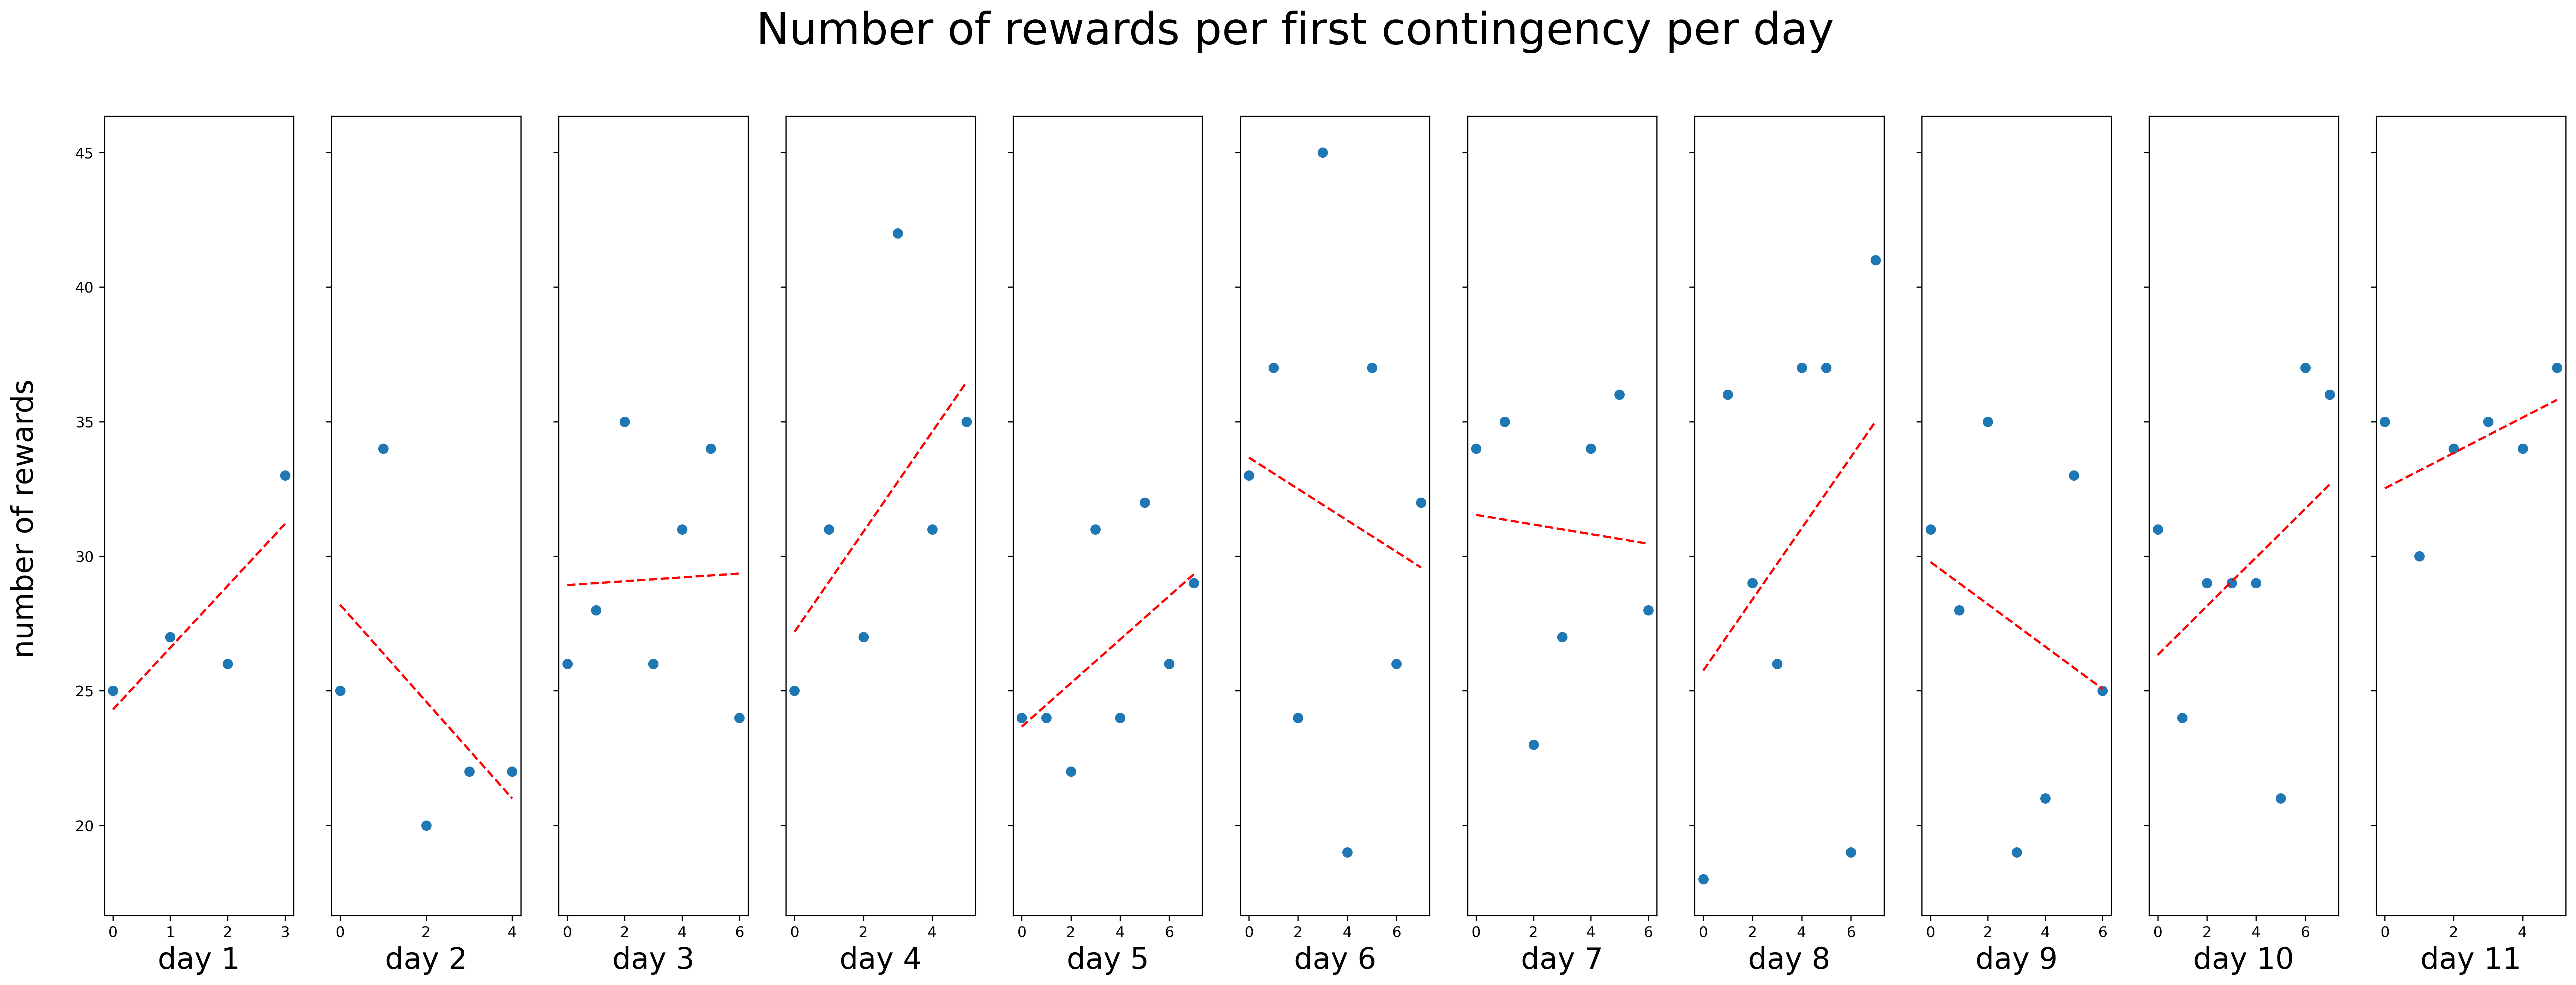

In [30]:
fig,ax = plt.subplots(1, 11,figsize=(30, 10), dpi=300, sharey=True)
fig.suptitle('Number of rewards per first contingency per day', fontsize=30)
#fig.ylabel()
#ax.set_ylabel('number of rewards')
fig.text(.1, 0.5, 'number of rewards', ha='center', va='center', rotation='vertical',fontsize=20)
for day in range(1,12):
    day_df= df_choice_first_cont[df_choice_first_cont.day==day]
    x=range(len(day_df))
    y=day_df.num_rew
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[day-1].scatter(x,y)
    ax[day-1].plot(x,p(x),"r--")
    ax[day-1].set_xlabel(f'day {day}',fontsize=20)
    #print(x,y)
    #plt.figure()
    

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6075
Date:                Tue, 26 Oct 2021   Prob (F-statistic):              0.438
Time:                        15:10:55   Log-Likelihood:                -235.95
No. Observations:                  74   AIC:                             475.9
Df Residuals:                      72   BIC:                             480.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1330      1.369     21.276      0.0

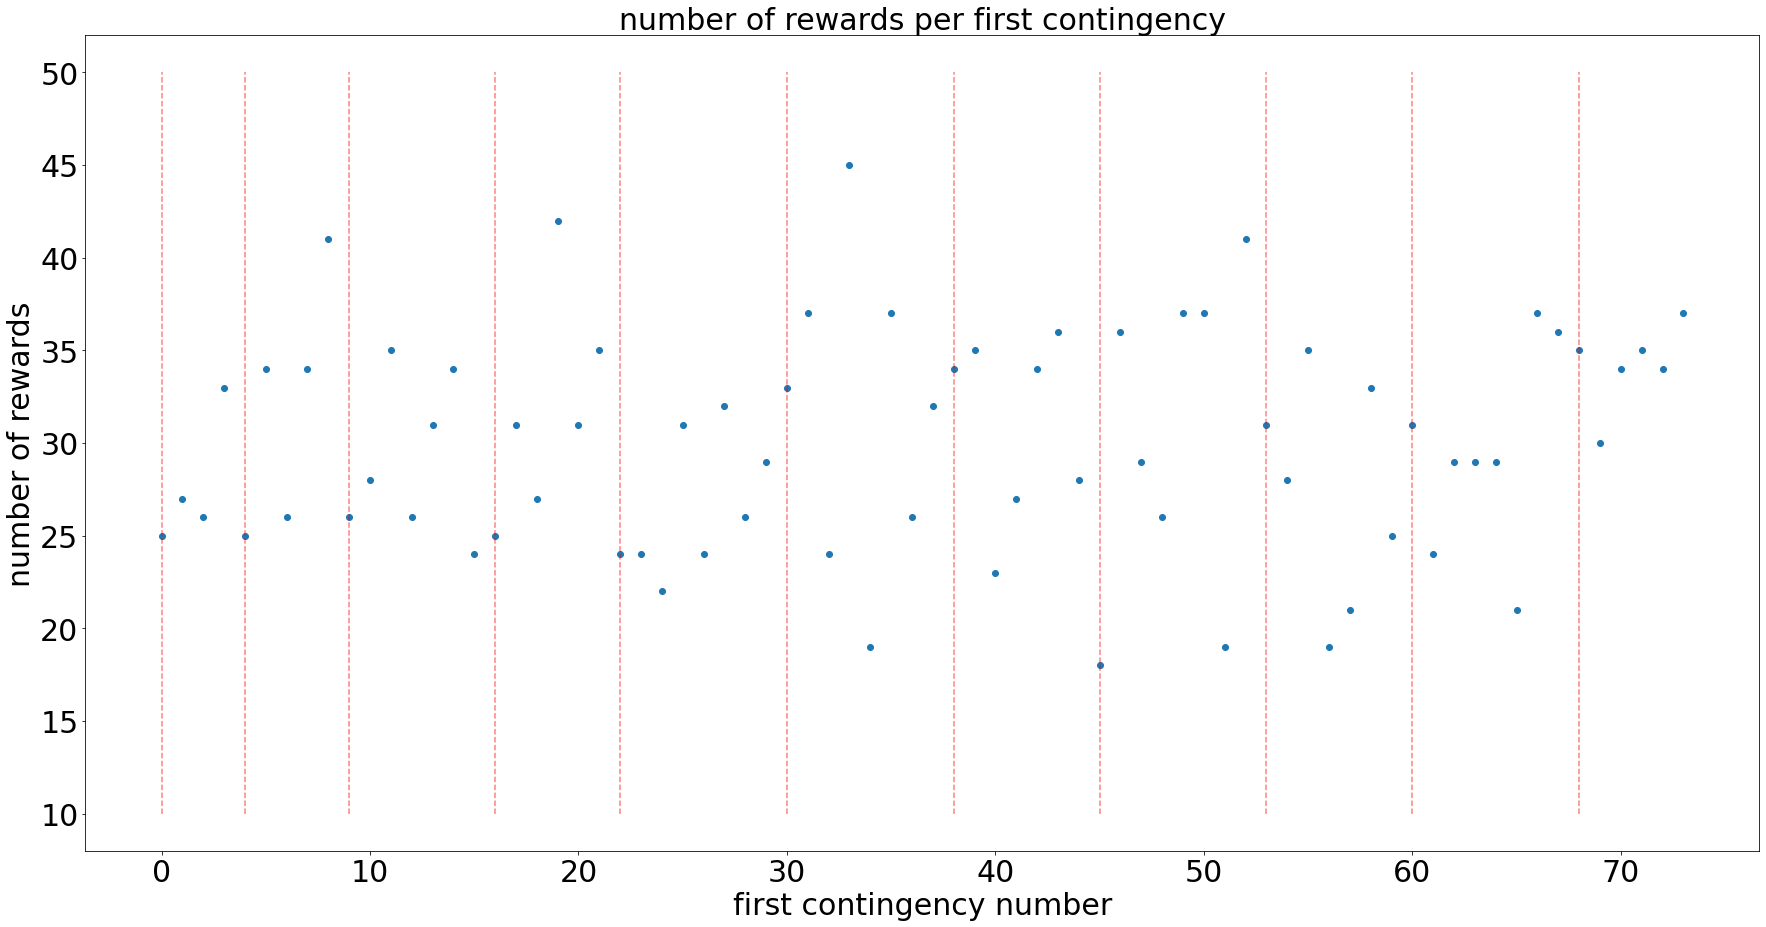

In [31]:
plt.figure(figsize=(30,15))
y= rewards_per_cont[0::3]
x= range(len(y))
plt.scatter(x,y)
plt.vlines((df_choice[df_choice['day_chng']].index-1)/3,10,50,colors='red', ls='--',alpha=0.5)
plt.xlabel("first contingency number",fontsize=30)
plt.ylabel('number of rewards',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('number of rewards per first contingency',fontsize=30)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/home/emonroe/miniconda2/envs/Analysis_EM/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/emonroe/miniconda2/envs/Analysis_EM/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/emonroe/miniconda2/envs/Analysis_EM/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/emonroe/miniconda2/envs/Analysis_EM/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:            stem_switch   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     5.239
Date:                Tue, 26 Oct 2021   Prob (F-statistic):             0.0451
Time:                        15:10:55   Log-Likelihood:                -32.515
No. Observations:                  12   AIC:                             69.03
Df Residuals:                      10   BIC:                             70.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0256      2.162      5.099      0.0

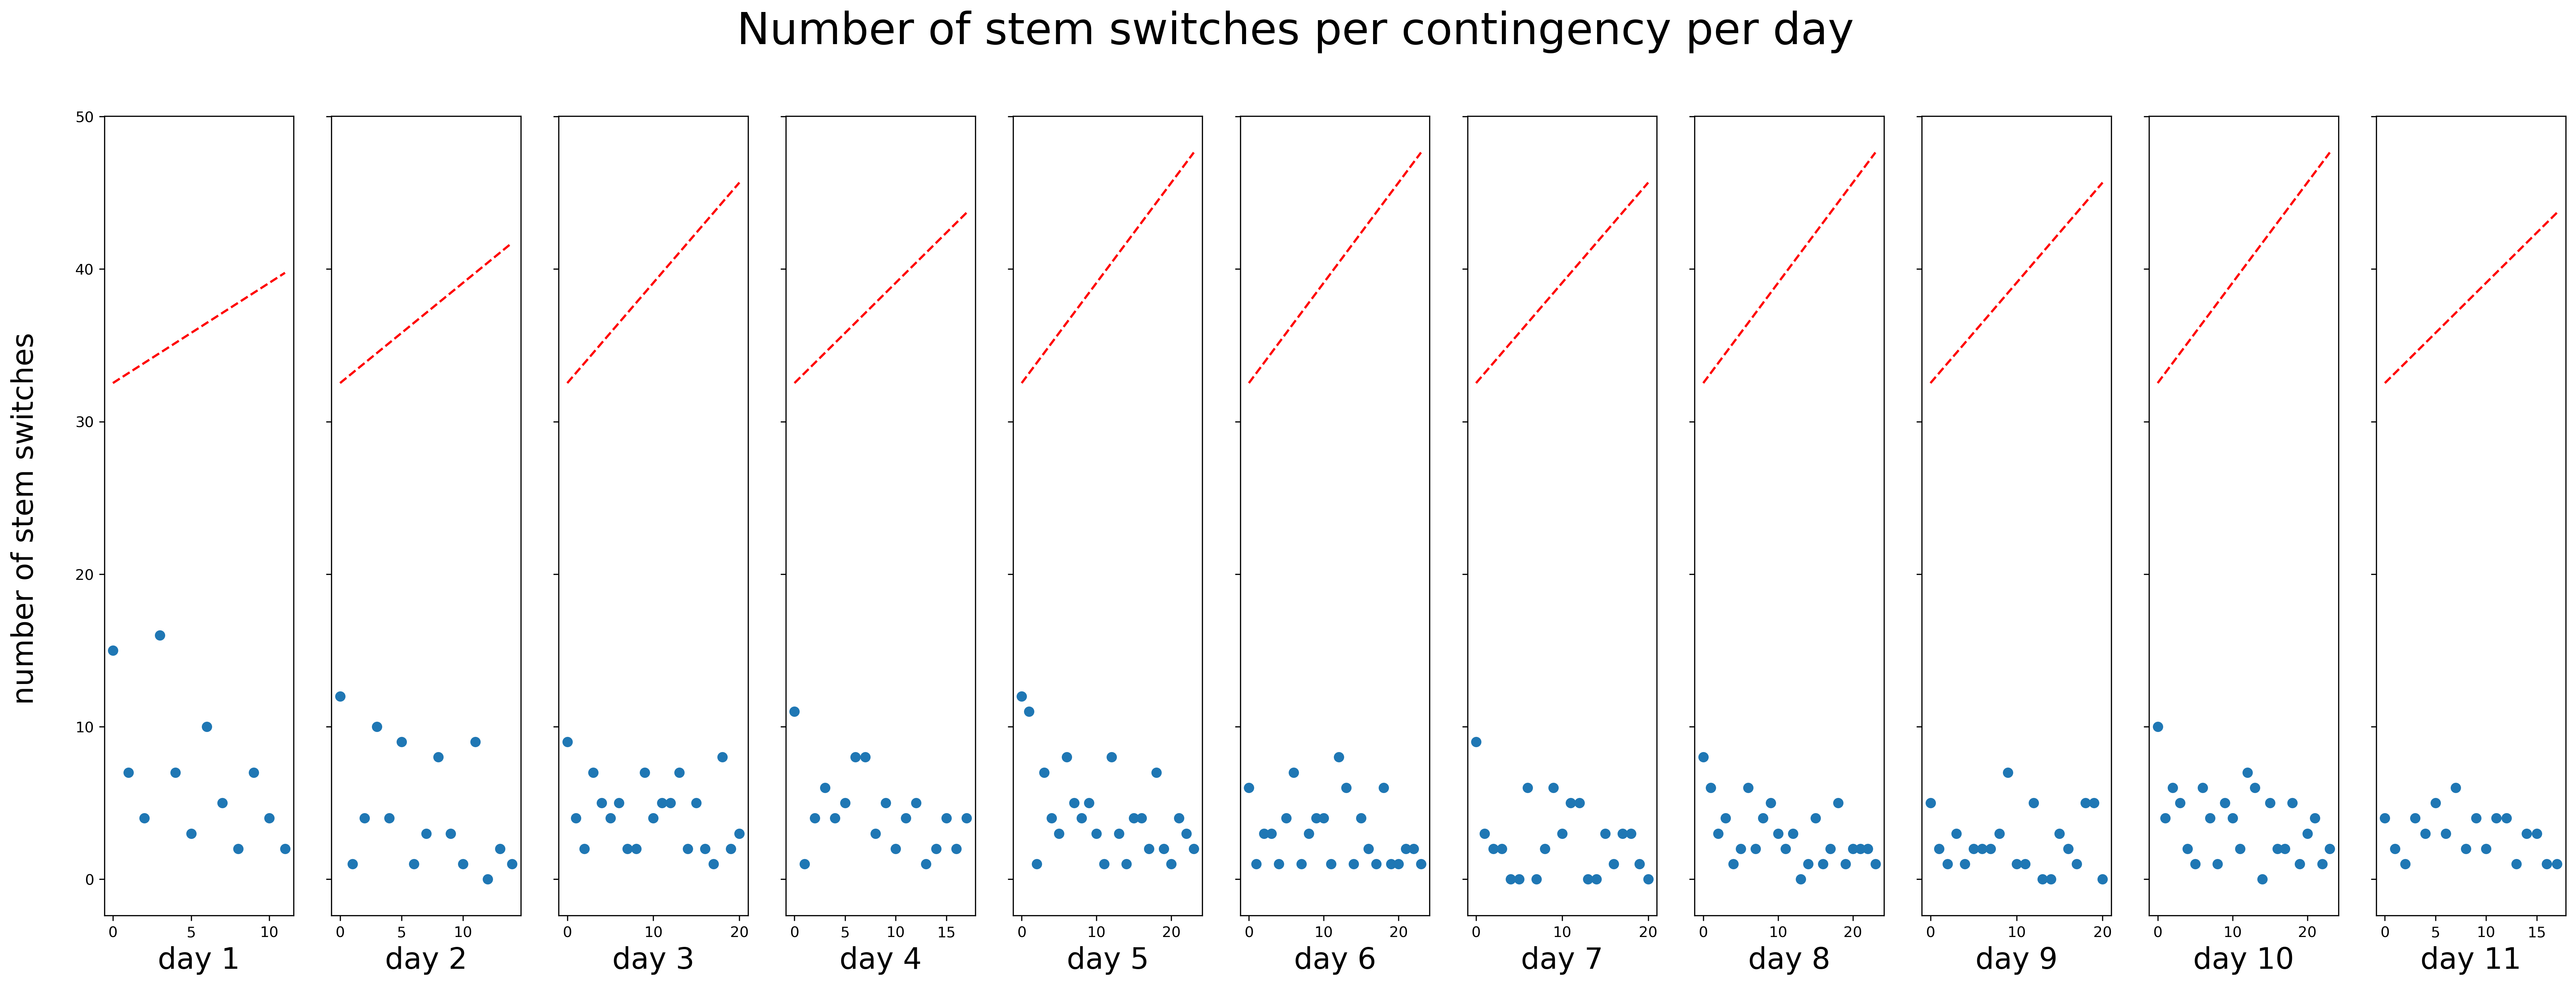

In [32]:
fig,ax = plt.subplots(1, 11,figsize=(30, 10), dpi=300, sharey=True)
fig.suptitle('Number of stem switches per contingency per day', fontsize=30)
#fig.ylabel()
#ax.set_ylabel('number of rewards')
fig.text(.1, 0.5, 'number of stem switches', ha='center', va='center', rotation='vertical',fontsize=20)
for day in range(1,12):
    day_df= df_choice[df_choice.day==day]
    x=range(len(day_df))
    y=day_df.stem_switch
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())
#     z = np.polyfit(x, y, 1)
#     p = np.poly1d(z)
    ax[day-1].scatter(x,y)
    ax[day-1].plot(x,p(x),"r--")
    ax[day-1].set_xlabel(f'day {day}',fontsize=20)
    #print(x,y)
    #plt.figure()
    

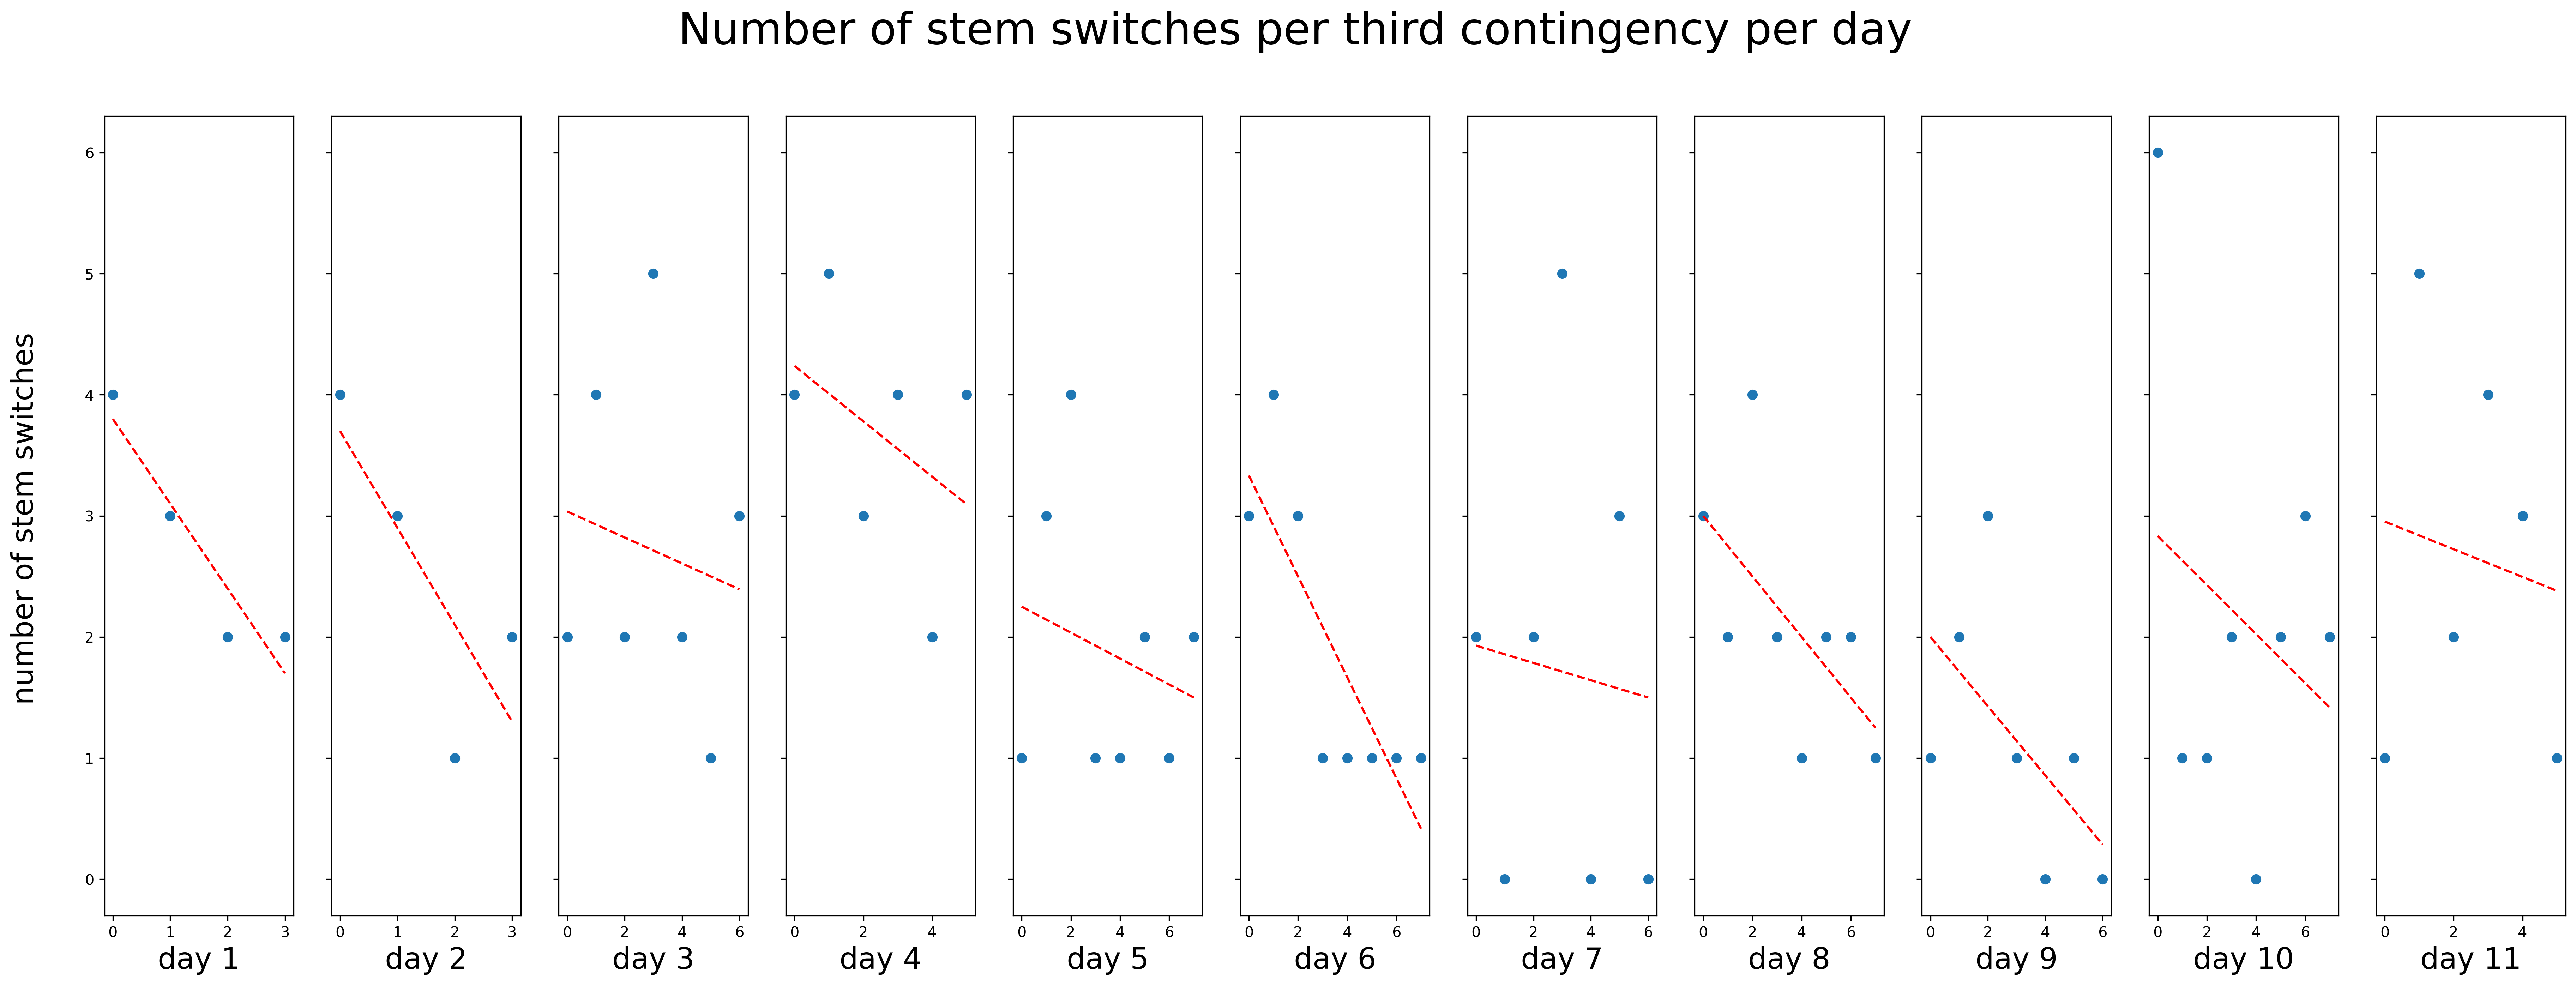

In [33]:
fig,ax = plt.subplots(1, 11,figsize=(30, 10), dpi=300, sharey=True)
fig.suptitle('Number of stem switches per third contingency per day', fontsize=30)
#fig.ylabel()
#ax.set_ylabel('number of rewards')
fig.text(.1, 0.5, 'number of stem switches', ha='center', va='center', rotation='vertical',fontsize=20)
for day in range(1,12):
    day_df= df_choice[df_choice.day==day]
    day_df=day_df[day_df.cont_num==3]
    x=range(len(day_df))
    y=day_df.stem_switch
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[day-1].scatter(x,y)
    ax[day-1].plot(x,p(x),"r--")
    ax[day-1].set_xlabel(f'day {day}',fontsize=20)
    plt.yticks(fontsize=20)
    
    #print(x,y)
    #plt.figure()

In [34]:
#was going to do this for every session (show that exploration goes down over a session ) but seems excessive 

In [35]:
df.loc[df.stem == "A", "ChooseA"] = "1"
df.loc[df.stem == "B", "ChooseB"] = "1"
df.loc[df.stem == "C", "ChooseC"] = "1"
df['ChooseA'] = df['ChooseA'].fillna(0)
df['ChooseB'] = df['ChooseB'].fillna(0)
df['ChooseC'] = df['ChooseC'].fillna(0)

In [36]:
#calc reward rate starting at new day, session for each stem
obj = ['day', 'session', 'stem']
df['rew_rate'] = df.groupby(obj)[['reward']].apply(lambda x: x.ewm(halflife=5).mean())
df['rolling_avg_A'] =df[df['stem']=='A']['rew_rate']
df['rolling_avg_B'] =df[df['stem']=='B']['rew_rate']
df['rolling_avg_C'] =df[df['stem']=='C']['rew_rate']


cols = ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']
# df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_A'] = 0
# df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_C'] = 0
df.loc[(df['trial']==0),'rolling_avg_A'] = 0
df.loc[(df['trial']==0),'rolling_avg_B'] = 0
df.loc[(df['trial']==0),'rolling_avg_C'] = 0

df.loc[:,cols] = df.loc[:,cols].ffill()

equal = (df['rolling_avg_A'] == df['rolling_avg_B']) | (df['rolling_avg_B'] == df['rolling_avg_C']) | (df['rolling_avg_A'] == df['rolling_avg_C'])
df['best_stem'] = df.loc[~equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)

df['best_stem2'] = df.loc[equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)
df
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_A')].index
df.loc[replace_index,'best_stem2'] = 'A'
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_B')].index
df.loc[replace_index,'best_stem2'] = 'B'
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_C')].index
df.loc[replace_index,'best_stem2'] = 'C'

replace_index = df.loc[(df['best_stem'] =='rolling_avg_A')].index
df.loc[replace_index,'best_stem'] = 'A'
replace_index = df.loc[(df['best_stem'] =='rolling_avg_B')].index
df.loc[replace_index,'best_stem'] = 'B'
replace_index = df.loc[(df['best_stem'] =='rolling_avg_C')].index
df.loc[replace_index,'best_stem'] = 'C'

df['at_best'] = np.where( df['stem'] == df['best_stem'] , '1', '0')
df['at_best2'] = np.where( df['stem'] == df['best_stem2'] , '1', '0')
df['best_all'] = df['at_best'] +df['at_best2']
# del df['at_best']
# del df['at_best2']
Not_at_Best = df[df['best_all']=='00']
at_best = df[df['best_all']=='01'] 
at_best2 = df[df['best_all']=='10']

df.loc[(df['best_all'] =='01'),'best_all']= 1
df.loc[(df['best_all'] =='10'),'best_all']= 1
df.loc[(df['best_all'] =='00'),'best_all']= 0

del df['at_best']
del df['at_best2']




Text(0, 0.5, 'prob')

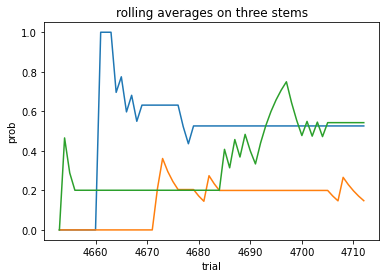

In [37]:
random_session =df[df['day']==5]
random_session = random_session[random_session['session']==5]
random_session = random_session[random_session['cont_num']==1]
plt.plot(random_session.rolling_avg_A)
plt.plot(random_session.rolling_avg_B)
plt.plot(random_session.rolling_avg_C)

random_session

plt.title('rolling averages on three stems')
plt.xlabel('trial')
plt.ylabel('prob')

In [38]:
#Trials at experienced best stem
#should calculate with beta? not validated, and harder. 

In [39]:
at_best_per_cont = []
for cont in range(1,df['new_cont'].max()+1):
    at_best= (df[df['new_cont']==cont]['best_all'].sum())
    at_best_per_cont.append(at_best)  

In [40]:
at_best_per_sesh = []
for cont in range(1,df['sess_chng'].max()+1):
    at_best= (df[df['sess_chng']==cont]['best_all'].sum())
    at_best_per_sesh.append(at_best)  

In [41]:
at_best_per_sesh

[86,
 120,
 139,
 81,
 111,
 17,
 118,
 115,
 135,
 106,
 128,
 126,
 109,
 111,
 131,
 84,
 84,
 69,
 99,
 66,
 146,
 112,
 103,
 111,
 128,
 154,
 102,
 135,
 151,
 143,
 78,
 54,
 135,
 112,
 124,
 146,
 157,
 166,
 114,
 2,
 157,
 77,
 40,
 139,
 140,
 91,
 152,
 109,
 126,
 50,
 151,
 130,
 148,
 110,
 97,
 137,
 145,
 144,
 154,
 115,
 84,
 138,
 142,
 142,
 41,
 113,
 103,
 152,
 151,
 110,
 106,
 104,
 150,
 156]

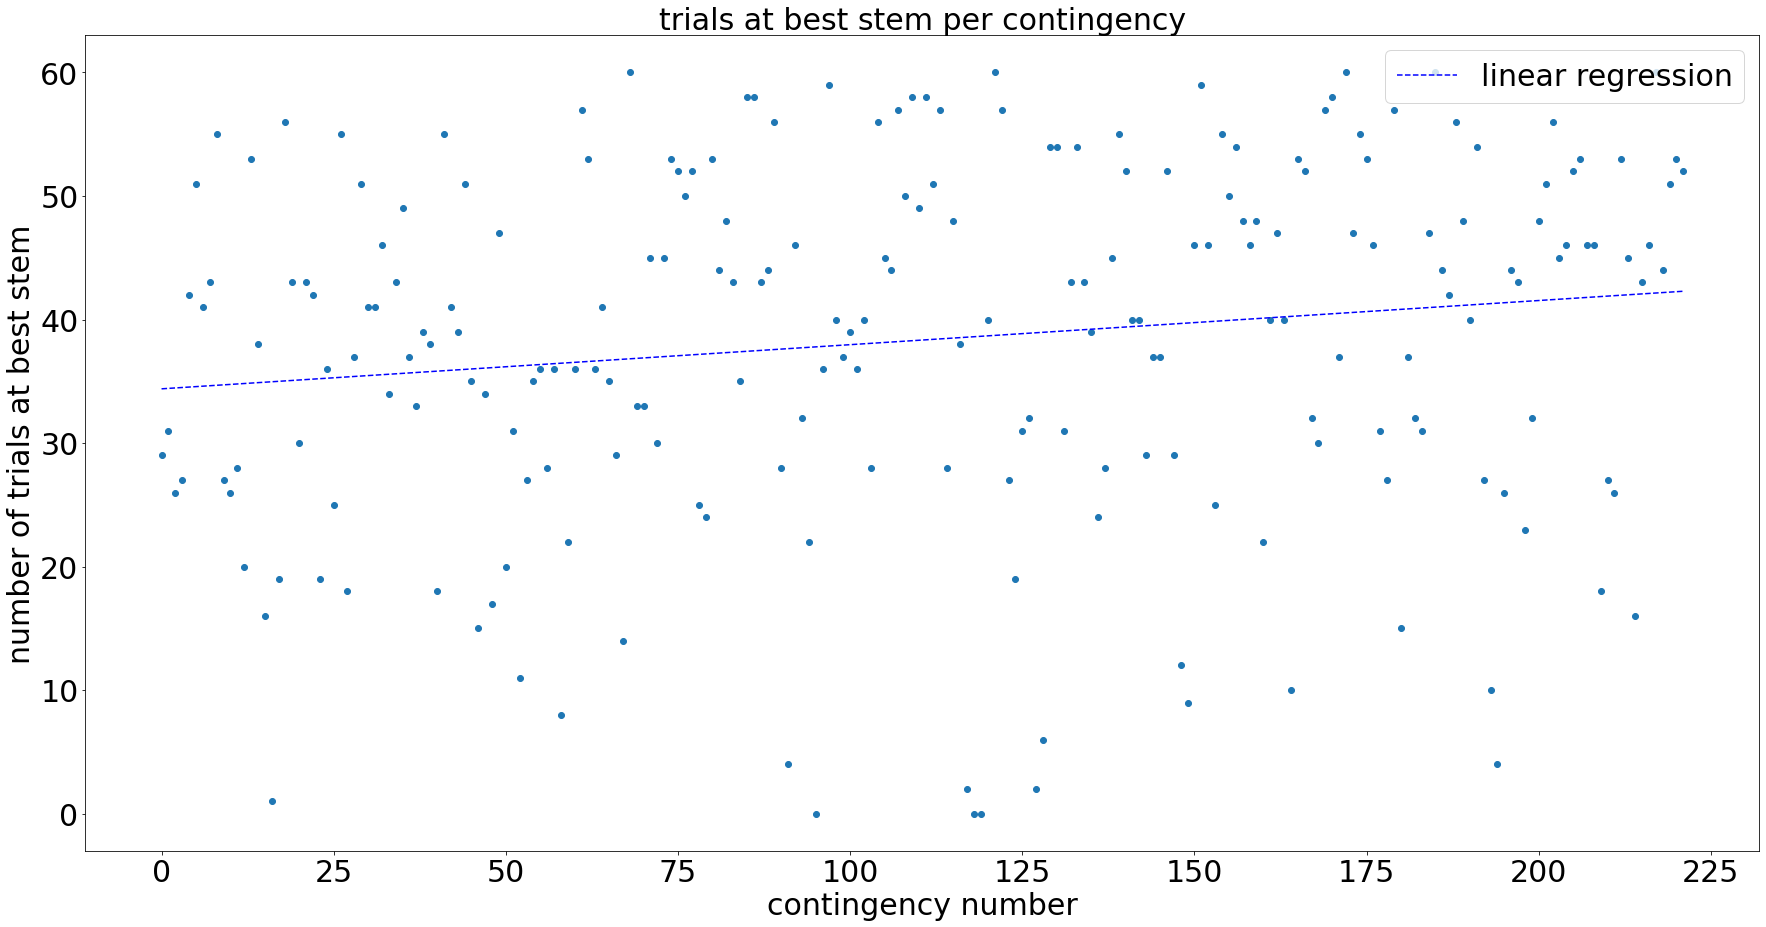

In [42]:
plt.figure(figsize=(30,15))
y= at_best_per_cont
x= range(len(at_best_per_cont))
# X2 = sm.add_constant(x)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())
df1 = pd.DataFrame(
    {'x': x,
     'y': y}
)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--",label='linear regression')
xmean = np.mean(x)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
df1['xvar'] = (df1['x'] - xmean)**2

# Calculate beta and alpha
# #beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line


plt.scatter(x,y)
# plt.vlines(df_choice[df_choice['day_chng']].index-1,0,60,colors='red', ls='--',alpha=0.5,label='day')
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number of trials at best stem',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(np.arange(0, 250, step=25),fontsize=30)
plt.yticks(np.arange(0, 70, step=10),fontsize=30)
plt.title('trials at best stem per contingency',fontsize=30)
plt.legend(loc ="upper right",fontsize=30)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.588
Date:                Tue, 26 Oct 2021   Prob (F-statistic):             0.0190
Time:                        15:10:59   Log-Likelihood:                -906.68
No. Observations:                 222   AIC:                             1817.
Df Residuals:                     220   BIC:                             1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3931      1.931     17.809      0.0

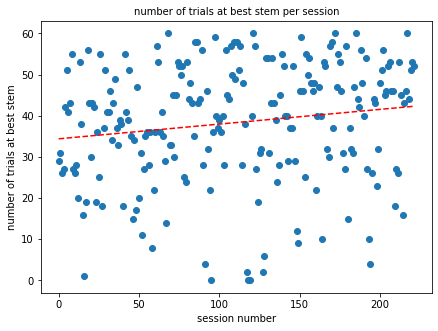

In [43]:
plt.figure(figsize=(7,5))
y= at_best_per_cont
x= range(len(y))
df1 = pd.DataFrame(
    {'x': x,
     'y': y}
)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
xmean = np.mean(x)
ymean = np.mean(y)

# # Calculate the terms needed for the numator and denominator of beta
# df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
# df1['xvar'] = (df1['x'] - xmean)**2

# # Calculate beta and alpha
# beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line

plt.scatter(x,y)
#plt.vlines((df_choice[df_choice['day_chng']].index-1)/3,0,175,colors='red', ls='--',alpha=0.5)
plt.xlabel("session number",fontsize=10)
plt.ylabel('number of trials at best stem',fontsize=10)
# plt.axhline(.33,ls='--')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('number of trials at best stem per session',fontsize=10)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

In [44]:

diabetes = datasets.load_diabetes()
# X = diabetes.data
# y = diabetes.target

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.588
Date:                Tue, 26 Oct 2021   Prob (F-statistic):             0.0190
Time:                        15:10:59   Log-Likelihood:                -906.68
No. Observations:                 222   AIC:                             1817.
Df Residuals:                     220   BIC:                             1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3931      1.931     17.809      0.0

In [45]:
df_choice = pd.DataFrame()
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
for cont in range(1,df['new_cont'].max()+1):
    cont_num= (df[df['new_cont']==cont]['cont_num'].max())
    day_num= (df[df['new_cont']==cont]['day'].max())
    session_num= (df[df['new_cont']==cont]['session'].max())
    cont_vals = (df[df['new_cont']==cont]['contingency'].max())
#     glob_avg= (df[df['new_cont']==cont]['glob_nom_avg'].max())
    num_rew= (df[df['new_cont']==cont]['reward'].sum())
    stem_switch = (df[df['new_cont']==cont]['stem_switch'].sum())
    dist = (df[df['new_cont']==cont]['dist_traveled'].max())
    atBest = (df[df['new_cont']==cont]['best_all'].sum())
#     df_choice.loc[cont,'num_a'] = num_a
#     df_choice.loc[cont,'num_b'] = num_b
#     df_choice.loc[cont,'num_c'] = num_c
#     df_choice.loc[cont, 'best_exp_stem'] = best_exp_stem
    #df_choice.loc[cont, 'prop_at_best'] = prop_at_best
    df_choice.loc[cont,'cont_num'] = cont_num
    df_choice.loc[cont,'day'] = day_num
    df_choice.loc[cont,'session'] = session_num
    df_choice.loc[cont,'contingency'] = cont_vals
    df_choice.loc[cont,'stem_switch']= stem_switch
    df_choice.loc[cont,'dist'] = dist
#     df_choice.loc[cont,'glob_nom_avg'] = glob_avg
    df_choice.loc[cont,'num_rew'] = num_rew
    df_choice.loc[cont,'at_best'] = atBest
df_choice['day_chng'] = df_choice['day'].ne(df_choice['day'].shift())

df_choice['cont_chng'] = df_choice['contingency'].ne(df_choice['contingency'].shift())
df_choice['session_chng'] = df_choice['session'].ne(df_choice['session'].shift())
df_choice

,cont_num,day,session,contingency,stem_switch,dist,num_rew,at_best,day_chng,cont_chng,session_chng
1,1.0,1.0,1.0,8.050202e+11,15.0,148.0,25.0,29.0,True,True,True
2,2.0,1.0,1.0,2.020502e+11,7.0,134.0,24.0,31.0,False,True,False
3,3.0,1.0,1.0,2.080508e+11,4.0,130.0,30.0,26.0,False,True,False
4,1.0,1.0,2.0,5.020208e+11,16.0,150.0,27.0,27.0,False,True,True
5,2.0,1.0,2.0,5.050502e+11,7.0,134.0,22.0,42.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
218,2.0,11.0,5.0,2.020208e+11,1.0,122.0,40.0,60.0,False,True,False
219,3.0,11.0,5.0,5.050202e+11,3.0,128.0,23.0,44.0,False,True,False
220,1.0,11.0,6.0,2.020205e+11,3.0,124.0,37.0,51.0,False,True,True
221,2.0,11.0,6.0,5.020805e+11,1.0,122.0,34.0,53.0,False,True,False


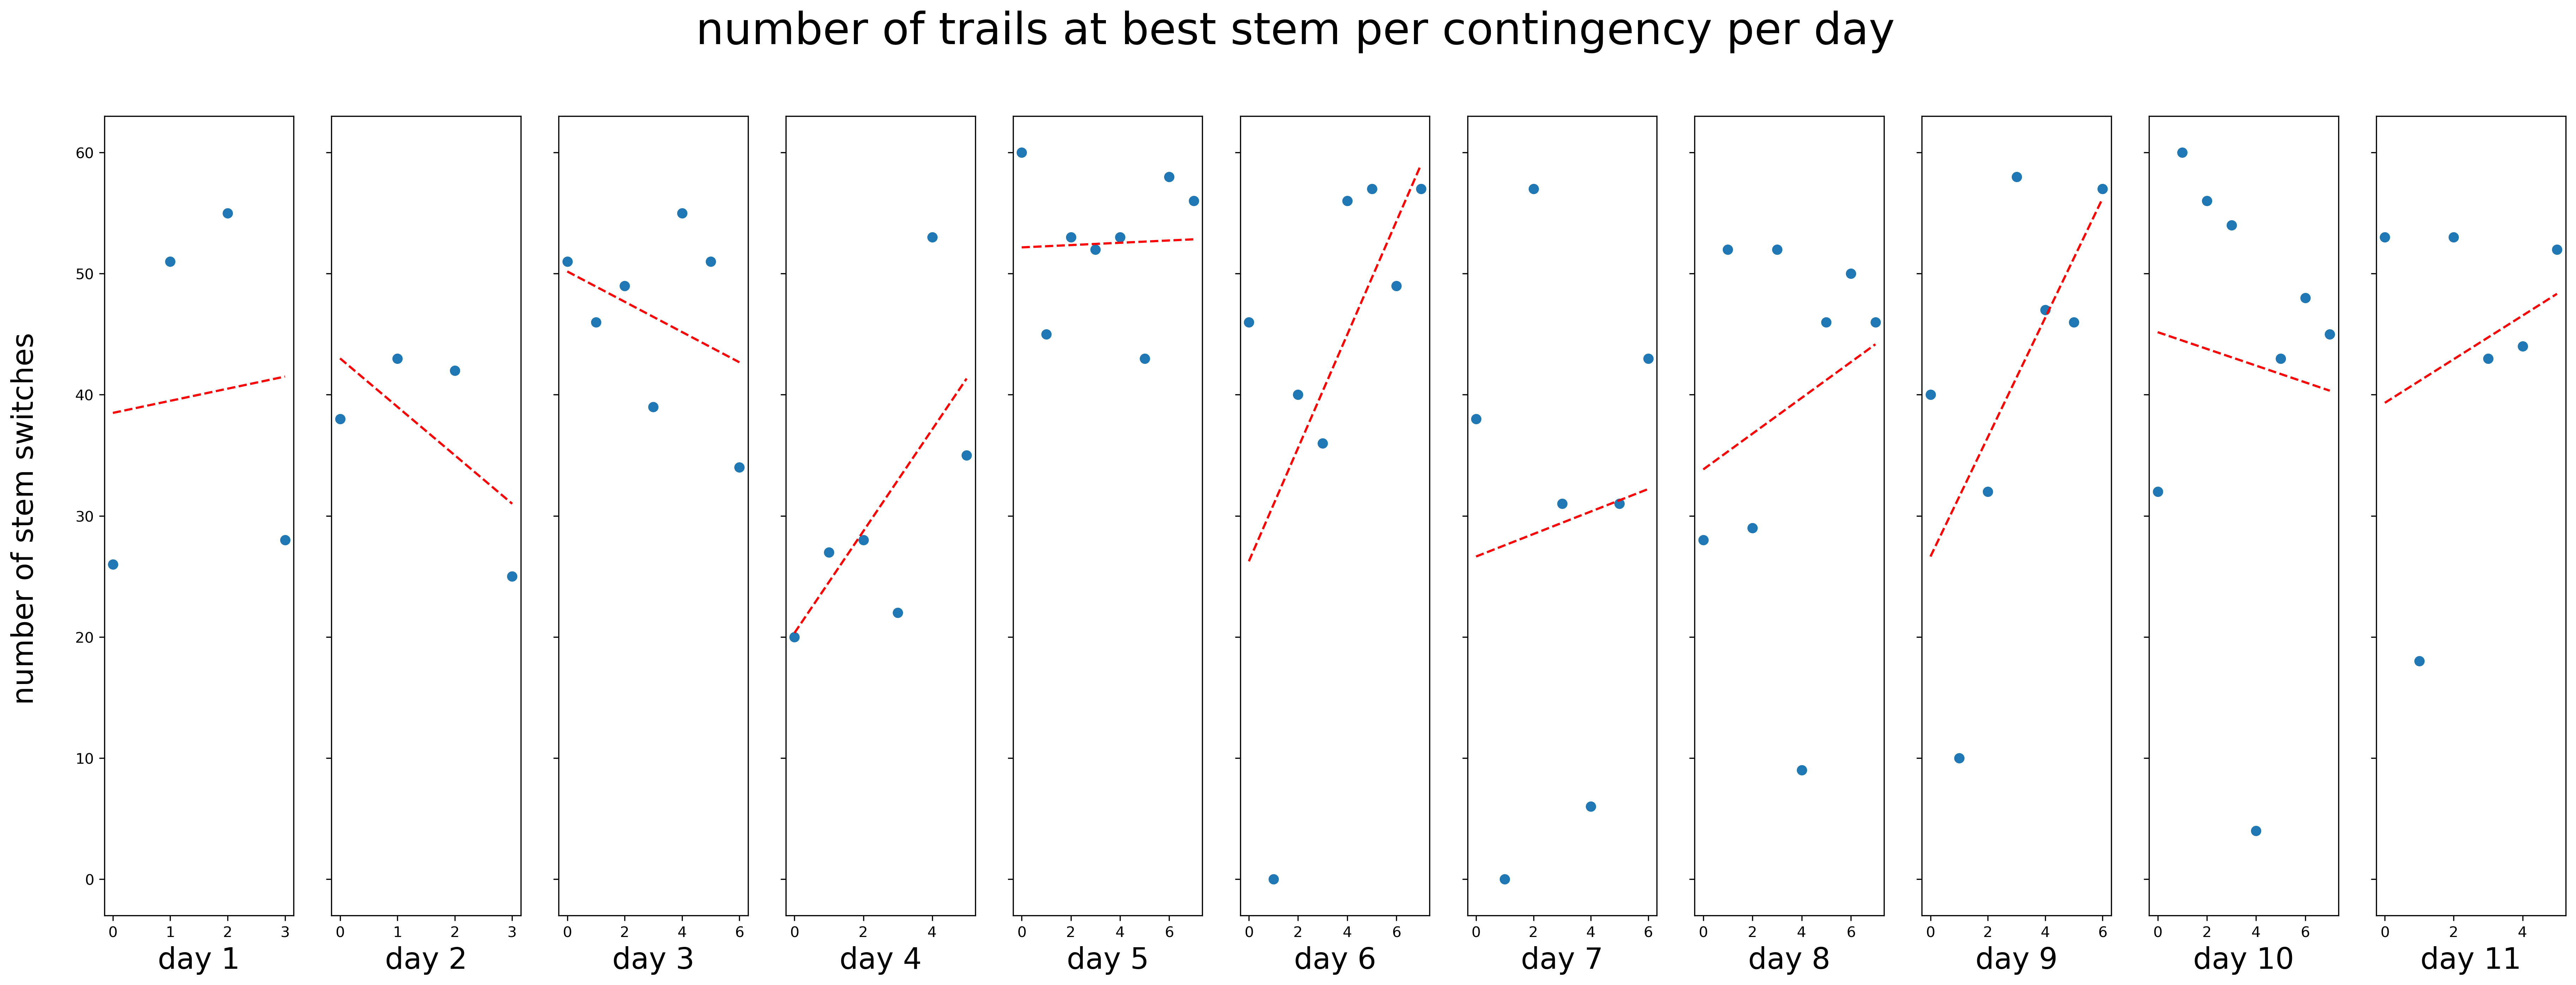

In [46]:
fig,ax = plt.subplots(1, 11,figsize=(30, 10), dpi=300, sharey=True)
fig.suptitle('number of trails at best stem per contingency per day', fontsize=30)
#fig.ylabel()
#ax.set_ylabel('number of rewards')
fig.text(.1, 0.5, 'number of stem switches', ha='center', va='center', rotation='vertical',fontsize=20)
for day in range(1,12):
    day_df= df_choice[df_choice.day==day]
    day_df=day_df[day_df.cont_num==3]
    x=range(len(day_df))
    y=day_df.at_best
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[day-1].scatter(x,y)
    ax[day-1].plot(x,p(x),"r--")
    ax[day-1].set_xlabel(f'day {day}',fontsize=20)
    plt.yticks(fontsize=20)

In [47]:
day_df

,cont_num,day,session,contingency,stem_switch,dist,num_rew,at_best,day_chng,cont_chng,session_chng
207,3.0,11.0,1.0,5.020205e+11,1.0,124.0,26.0,53.0,False,True,False
210,3.0,11.0,2.0,2.020202e+11,5.0,130.0,9.0,18.0,False,True,False
213,3.0,11.0,3.0,2.020802e+11,2.0,124.0,24.0,53.0,False,True,False
216,3.0,11.0,4.0,2.020508e+11,4.0,128.0,27.0,43.0,False,True,False
219,3.0,11.0,5.0,5.050202e+11,3.0,128.0,23.0,44.0,False,True,False
222,3.0,11.0,6.0,5.080202e+11,1.0,120.0,31.0,52.0,False,True,False


In [48]:
# would still like to use beta distribution to calc which is the best 
#also stem switch over days is really interesting, should go abck to betas, compare first and last sesisons of the day. 
#what do the distributions look like after every stem switch, where does he choose to go? 
#at the last sessions of the day, does the beta distribution fit his behavior better? 
#for each session, plot bout lengths 


In [ ]:
# This cell will show how long each of the bouts are for each session 


for ix in range(1,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==ix]
    random_session = random_session[random_session['cont_num']==1]
    cont_nom=random_session.contingency.iloc[0]
    day_nom=random_session.day.iloc[0]
    sesh_nom=random_session.session.iloc[0]
    #random_session = random_session[random_session['cont_num']==1]
    #random_session['stem_switch']
    bout = random_session[random_session.stem_switch==1]

    #bout

    bout_lens = []
    for ix in range(len(bout)+1):
        if ix < len(bout):
            bout_lens.append( bout['trial'].iloc[ix] -bout['trial'].iloc[ix-1])
        elif ix == len(bout):
            bout_lens.append( 60 -bout['trial'].iloc[ix-1])
    bout_lens.pop(0)
    plt.figure()
    plt.plot(bout_lens)
    plt.title(f'day {day_nom} session {sesh_nom} {cont_nom}')
    plt.xlim(0,17)
    plt.xlabel('bout number')
    plt.ylabel('bout length')
    plt.ylim(0,45)
#     chose_a = random_session[random_session['stem']=='A']
#     chose_b = random_session[random_session['stem']=='B']
#     chose_c = random_session[random_session['stem']=='C']
#     if len(chose_a) > len(chose_b) & len(chose_a) > len(chose_c):
#         longest = 'A'
#     if len(chose_b) > len(chose_c) & len(chose_b) > len(chose_a):
#         longest = 'B'  
#     if len(chose_c) > len(chose_b) & len(chose_c) > len(chose_a):
#         longest = 'C' 
#     s_a= chose_a['reward'].sum()
#     f_a = len(chose_a)-s_a
#     s_b= chose_b['reward'].sum()
#     f_b = len(chose_b)-s_b
#     s_c= chose_c['reward'].sum()
#     f_c = len(chose_c)-s_c
# #     trials_a= random_session.ChooseA.sum()
# #     trials_b= random_session.ChooseB.sum()

# #     trials_c= random_session.ChooseC.sum()


# #     y1 = beta(s_a+1, f_a+1)
    
# #     y2 = beta(s_b+1, f_b+1)
# #     y3 = beta(s_c+1, f_c+1)
    
#     mean_a, var_a, skew_a, kurt_a = beta.stats(s_a+1, f_a+1, moments='mvsk')
#     mean_b, var_b, skew_b, kurt_b = beta.stats(s_b+1, f_b+1, moments='mvsk')
#     mean_c, var_c, skew_c, kurt_c = beta.stats(s_c+1, f_c+1, moments='mvsk')

#     lst_means_a.append(mean_a)
#     lst_means_b.append(mean_b)
#     lst_means_c.append(mean_c)
#     lst_var_a.append(var_a)
#     lst_var_b.append(var_b)
#     lst_var_c.append(var_c)
#     lst_skew_a.append(skew_a)
#     lst_skew_b.append(skew_b)
#     lst_skew_c.append(skew_c)
#     lst_kurt_a.append(kurt_a)
#     lst_kurt_b.append(kurt_b)
#     lst_kurt_c.append(kurt_c)
#     trials_a.append(len(chose_a))
#     trials_b.append(len(chose_b))
#     trials_c.append(len(chose_c))







#    # lst_var.append([var_a,var_b,var_c])
# #     lst_skew.append([skew_a,skew_b,skew_c])
# #     lst_kurt.append([kurt_a,kurt_b,kurt_c])
    
#     #[[meana,b,c session1 ],[meana,b,c session2]]
# #     x = np.linspace(0, 1, 10000)
# #     y1 = beta(first_bout_beta_data_s+1, first_bout_beta_data_f+1)
# #     y2 = beta(second_bout_beta_data_s+1, second_bout_beta_data_f+1)
# #     y3 = beta(third_bout_beta_data_s+1, third_bout_beta_data_f+1)
# #     #     ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
# #     #     ax.set_xlabel("X", fontsize=16)
# #     #     ax.set_ylabel("Probability Density", fontsize=16)
# #     plt.figure()
# #     plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick')
# #     plt.plot(x, y2.pdf(x), linewidth=3, color='black')
# #     plt.plot(x, y3.pdf(x), linewidth=3, color='purple')
# #     plt.xlabel('x')
# #     plt.ylabel('probability distribution')
# #     plt.title(f'beta dist for three stems- {cont_nom}')
# #     plt.legend(['A', "B",'C'])
# #     plt.annotate(f'{random_session.ChooseA.sum()}  {random_session.ChooseB

In [50]:
# for ix in range(1,(df['sess_chng']).max()):
#     random_session = df[df['sess_chng']==ix]
#     random_session = random_session[random_session['cont_num']==1]
#     cont_nom=random_session.contingency.iloc[0]
#     day_nom=random_session.day.iloc[0]
#     sesh_nom=random_session.session.iloc[0]
#     #random_session = random_session[random_session['cont_num']==1]
#     #random_session['stem_switch']
#     bout = random_session[random_session.stem_switch==1]
#     for ix in range(len(bout)+1):
        
# #     chose_a = random_session[random_session['stem']=='A']
#     chose_b = random_session[random_session['stem']=='B']
#     chose_c = random_session[random_session['stem']=='C']
#     if len(chose_a) > len(chose_b) & len(chose_a) > len(chose_c):
#         longest = 'A'
#     if len(chose_b) > len(chose_c) & len(chose_b) > len(chose_a):
#         longest = 'B'  
#     if len(chose_c) > len(chose_b) & len(chose_c) > len(chose_a):
#         longest = 'C' 
#     s_a= chose_a['reward'].sum()
#     f_a = len(chose_a)-s_a
#     s_b= chose_b['reward'].sum()
#     f_b = len(chose_b)-s_b
#     s_c= chose_c['reward'].sum()
#     f_c = len(chose_c)-s_c
# #     trials_a= random_session.ChooseA.sum()
# #     trials_b= random_session.ChooseB.sum()

# #     trials_c= random_session.ChooseC.sum()


# #     y1 = beta(s_a+1, f_a+1)
    
# #     y2 = beta(s_b+1, f_b+1)
# #     y3 = beta(s_c+1, f_c+1)
    
#     mean_a, var_a, skew_a, kurt_a = beta.stats(s_a+1, f_a+1, moments='mvsk')
#     mean_b, var_b, skew_b, kurt_b = beta.stats(s_b+1, f_b+1, moments='mvsk')
#     mean_c, var_c, skew_c, kurt_c = beta.stats(s_c+1, f_c+1, moments='mvsk')

#     lst_means_a.append(mean_a)
#     lst_means_b.append(mean_b)
#     lst_means_c.append(mean_c)
#     lst_var_a.append(var_a)
#     lst_var_b.append(var_b)
#     lst_var_c.append(var_c)
#     lst_skew_a.append(skew_a)
#     lst_skew_b.append(skew_b)
#     lst_skew_c.append(skew_c)
#     lst_kurt_a.append(kurt_a)
#     lst_kurt_b.append(kurt_b)
#     lst_kurt_c.append(kurt_c)
#     trials_a.append(len(chose_a))
#     trials_b.append(len(chose_b))
#     trials_c.append(len(chose_c))







#    # lst_var.append([var_a,var_b,var_c])
# #     lst_skew.append([skew_a,skew_b,skew_c])
# #     lst_kurt.append([kurt_a,kurt_b,kurt_c])
    
#     #[[meana,b,c session1 ],[meana,b,c session2]]
# #     x = np.linspace(0, 1, 10000)
# #     y1 = beta(first_bout_beta_data_s+1, first_bout_beta_data_f+1)
# #     y2 = beta(second_bout_beta_data_s+1, second_bout_beta_data_f+1)
# #     y3 = beta(third_bout_beta_data_s+1, third_bout_beta_data_f+1)
# #     #     ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
# #     #     ax.set_xlabel("X", fontsize=16)
# #     #     ax.set_ylabel("Probability Density", fontsize=16)
# #     plt.figure()
# #     plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick')
# #     plt.plot(x, y2.pdf(x), linewidth=3, color='black')
# #     plt.plot(x, y3.pdf(x), linewidth=3, color='purple')
# #     plt.xlabel('x')
# #     plt.ylabel('probability distribution')
# #     plt.title(f'beta dist for three stems- {cont_nom}')
# #     plt.legend(['A', "B",'C'])
# #     plt.annotate(f'{random_session.ChooseA.sum()}  {random_session.ChooseB

In [51]:
bout = random_session[random_session.stem_switch==1]
bout


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,ChooseA,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all
12937,12937,2,A,0,805020205020,20201107,5,4,11,1,...,1,0,0,0.000000,0.000000,0.534602,0.000000,NaN,B,0
12950,12950,5,C,1,805020205020,20201107,5,17,11,1,...,0,0,1,1.000000,0.474145,0.534602,1.000000,C,NaN,1
12957,12957,4,B,0,805020205020,20201107,5,24,11,1,...,0,1,0,0.396194,0.474145,0.396194,0.210435,A,NaN,0
12963,12963,2,A,0,805020205020,20201107,5,30,11,1,...,1,0,0,0.402476,0.402476,0.132065,0.210435,A,NaN,1


In [52]:
bout_lens

[13, 7, 6, 30]

In [53]:
#things I can calculate today: 
#are contingencies balanced? 
#some real data (maybe can just use alisons, but what do I have?)
#beta!!! 
#im just trying to describe exactly what the rat is doing
#imagine this rat, just trying to figure out how to get reward. Testing out
#different strategies to see what gets him the most reward
#at some point, he realizes that the ones that give him the most reward in the beginning
#gives him the most reward later on in the session. 
#he learns stability. 


In [54]:
# df_first_day = df[df['day']==1]


# df_1_1 = df_first_day[df_first_day['session']==1]
# df_1_1 = df_1_1[df_1_1['cont_num']==1]
# bout = df_1_1[df_1_1.stem_switch==1]
# for ix in range(1,len(bout)+1):
#     stem_bout=df_1_1[df_1_1['bout_num']==ix]
#     num_trials=len(stem_bout)
#     num_rewards = stem_bout['reward'].sum()    
#     #num_rewards = stem_bout['rew_count'].max()
#     num_failures = num_trials - num_rewards
#     al = num_rewards+1
#     bet = num_failures+1
#     y1 = beta(al,bet)
#     session = stem_bout['session'].iloc[0]
#     day = stem_bout['day'].iloc[0]
#     stem = stem_bout['stem'].iloc[0]
#     x = np.linspace(0, 1, 10000)
#     plt.figure()
#     plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick')
#     plt.title(f'each bout, dist, session = {session}, day = {day} stem = {stem},bout_len = {num_trials}')

In [55]:
# df_day = df[df['day']==10]
# df_day_sesh = df_day[df_day['session']==7]
# df_day_sesh = df_day_sesh[df_day_sesh['cont_num']==1]
# bout = df_day_sesh[df_day_sesh.stem_switch==1]
# #bout is the df with every first trial after stem switch- to find indexes for the start of each bout

# for ix in range(len(bout)+1):
#     #bout['bout_num1'] = bout['bout_num'].ne(bout['bout_num'].shift()).cumsum()
#     stem_bout=df_day_sesh[df_day_sesh['bout_num']==ix+(df_day_sesh['bout_num'].min())]
#     plt.figure()
#     #plt.annotate(f'bout len={len(stem_bout)}',xy=(.5,1))
#     for ix2 in range(len(stem_bout)):
#         stem_bout_trial = stem_bout.iloc[0:ix2+1]
#         num_trials=len(stem_bout_trial)
#         num_rewards = stem_bout_trial['reward'].sum()    
#         #num_rewards = stem_bout['rew_count'].max()
#         num_failures = num_trials - num_rewards
#         al = num_rewards+1
#         bet = num_failures+1
#        # y1 = beta(al,bet)
#         session = stem_bout['session'].iloc[0]
#         day = stem_bout['day'].iloc[0]
#         stem = stem_bout['stem'].iloc[0]
#         x = np.linspace(0, 1, 10000)
#         if stem == "A":
#             colors= 'red'
#         elif stem == 'B':
#             colors = 'black'
#         elif stem=='C':
#             colors = 'green'
#         plt.plot(x, y1.pdf(x), linewidth=3, color=colors,alpha=num_trials/len(stem_bout))
#         plt.vlines(.6,0,3)
#         plt.title(f'each bout, dist, session = {session}, day = {day} stem = {stem},bout_len = {num_trials}')

NameError: name 'y1' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
#THis cell will show the dsitributions of the stems before the first exploit 

# for session in range(1,(df['sess_chng']).max()):
#     random_session = df[df['sess_chng']==session]

#     random_session = random_session[random_session['cont_num']==1]
#     bout = random_session[random_session.stem_switch==1]
#     session = random_session['session'].iloc[0]
#     day =random_session['day'].iloc[0]
#     #stem = bout['stem'].iloc[0]
       
#     bout_lens = []
#     for ix in range(len(bout)+1):
#         if ix < len(bout):
#             bout_lens.append( bout['trial'].iloc[ix] -bout['trial'].iloc[ix-1])
#         elif ix == len(bout):
#             bout_lens.append( 60 -bout['trial'].iloc[ix-1])
#     bout_lens.pop(0)

#     long_bout=[]
#     for ix in range(len(bout_lens)):
#         long_bout.append((bout_lens[ix]>10))


#     res = [i for i, val in enumerate(long_bout) if val]

#     if res:
#         before_exploit = bout.iloc[0:res[0]]

#         rew_sum=[]
#         for ix in range(len(bout)+1):
#             if ix < len(bout):
#                 bout1 = random_session.loc[bout.index[ix-1]:bout.index[ix]-1]
#                 rew_sum.append(bout1.reward.sum())
#         rew_sum.pop(0)

# # #         #want to make a new df(?) that has stem, length of bout, and how many rewards. 
# # #         #later will combine same stems. 
#         meta_data = pd.DataFrame(before_exploit.stem)
#         meta_data['bout_len'] = bout_lens[0:res[0]]
#         meta_data['rew_num'] = rew_sum[0:res[0]]
#         exploits_first = bout.iloc[res[0]].stem
#         exploit_trial = bout.iloc[res[0]].trial
#         cont= random_session.iloc[0]['contingency']
#         meta_data['conting'] = cont
#         if len(meta_data[meta_data.stem=='C']) >1:
#             combined_bout_len_c = (meta_data[meta_data.stem=='C']).bout_len.sum()
#             combined_rew_c = (meta_data[meta_data.stem=='C']).rew_num.sum()
#         elif len(meta_data[meta_data.stem=='C']) ==1:
#             combined_bout_len_c = (meta_data[meta_data.stem=='C']).bout_len.sum()
#             combined_rew_c = (meta_data[meta_data.stem=='C']).rew_num.sum()
#         if len(meta_data[meta_data.stem=='A']) >1:
#             combined_bout_len_a = (meta_data[meta_data.stem=='A']).bout_len.sum()
#             combined_rew_a = (meta_data[meta_data.stem=='A']).rew_num.sum()
#         elif len(meta_data[meta_data.stem=='A']) ==1:
#             combined_bout_len_a = (meta_data[meta_data.stem=='A']).bout_len.sum()
#             combined_rew_a = (meta_data[meta_data.stem=='A']).rew_num.sum()
#         if len(meta_data[meta_data.stem=='B']) >1:
#             combined_bout_len_b = (meta_data[meta_data.stem=='B']).bout_len.sum()
#             combined_rew_b = (meta_data[meta_data.stem=='B']).rew_num.sum()
#         elif len(meta_data[meta_data.stem=='B']) ==1:
#             combined_bout_len_b = (meta_data[meta_data.stem=='B']).bout_len.sum()
#             combined_rew_b = (meta_data[meta_data.stem=='B']).rew_num.sum()
#         stem = ["A",'B','C']
#         bout_len = [combined_bout_len_a,combined_bout_len_b,combined_bout_len_c]
#         rew = [combined_rew_a,combined_rew_b,combined_rew_c]
#         combined_meta_data=pd.DataFrame(stem)
#         combined_meta_data['stem'] = pd.DataFrame(stem)
#         combined_meta_data['rew']= rew
#         combined_meta_data['bout_len']=bout_len
#         plt.figure()
#         for ix in range(len(combined_meta_data)):
#             n_s = combined_meta_data.iloc[ix]['rew']
#             n_f = combined_meta_data.iloc[ix]['bout_len']-n_s
#             x = np.linspace(0, 1, 10000)
#             y1 = beta(n_s+1, n_f+1)
#             plt.plot(x, y1.pdf(x),alpha=.5)
#             plt.legend(['A','B','C'])
#             plt.title(f'each bout, dist, session = {session}, day = {day}')


#             plt.annotate(f'first exploited:{exploits_first},\n{cont}\ntrial {exploit_trial} \nnumber bouts={len(bout)}', xy=(1.0,2))

In [2]:
###(THIS IS THE EXAMPLE CELLLLLLL)


#This one is where its at! change your session and it will plot all trials of a contingency, where he at at and where he goes ext. 
#want to use this same idea to only look at stem switch times. 
session=10
random_session = df[df['sess_chng']==session]
random_session = random_session[random_session['cont_num']==1]
random_session["chooseA"] = pd.to_numeric(random_session["ChooseA"])
random_session['Num_trials_A'] = (random_session['chooseA']).cumsum()   
random_session["chooseB"] = pd.to_numeric(random_session["ChooseB"])
random_session['Num_trials_B'] = (random_session['chooseB']).cumsum()   
random_session["chooseC"] = pd.to_numeric(random_session["ChooseC"])
random_session['Num_trials_C'] = (random_session['chooseC']).cumsum()   
#     random_session['num_rew_a'] = [random_session['stem']=='A']['rew_co']
random_session['rew_count_a'] = random_session[random_session['stem']=='A']['rew_count_session']
random_session['rew_count_a']=random_session['rew_count_a'].ffill()
random_session['rew_count_a']=random_session['rew_count_a'].ffill()
random_session['rew_count_a'] = random_session['rew_count_a'].fillna(0)
random_session['rew_count_b'] = random_session[random_session['stem']=='B']['rew_count_session']
random_session['rew_count_b']=random_session['rew_count_b'].ffill()
random_session['rew_count_b'] = random_session['rew_count_b'].fillna(0)

random_session['rew_count_c'] = random_session[random_session['stem']=='C']['rew_count_session']
random_session['rew_count_c']=random_session['rew_count_c'].ffill()
random_session['rew_count_c'] = random_session['rew_count_c'].fillna(0)
    



for ix in range(len(random_session)):
    bout = random_session[random_session.stem_switch==1]

    if random_session.iloc[ix+1]['stem_switch']==1:
        plt.figure()
        trial = random_session.iloc[ix]
        if ix <len(random_session):
            next_trial=random_session.iloc[ix+1].stem
        current_stem=trial.stem
        if ix != 0:
            last_trial = random_session.iloc[ix-1].stem
        else:
            last_trial = "none"
        day = trial.day
        session = trial.session
        trial_num = trial.trial
        contin=trial.contingency
        ns_a = trial.rew_count_a
        ns_b = trial.rew_count_b
        ns_c = trial.rew_count_c
        nf_a = trial.Num_trials_A - ns_a
        nf_b = trial.Num_trials_B - ns_b
        nf_c = trial.Num_trials_C - ns_c
        x = np.linspace(0, 1, 10000)
        y1 = beta(ns_a+1, nf_a+1)
        y2 = beta(ns_b+1, nf_b+1)
        y3 = beta(ns_c+1, nf_c+1)
        plt.plot(x, y1.pdf(x))
        plt.plot(x, y2.pdf(x))
        plt.plot(x, y3.pdf(x))
        plt.legend(['A','B','C'])
        plt.title(f'current stem {current_stem},next trial = {next_trial}\nday={day} session = {session}\n{contin},\n trial num {trial_num}')
    else:
        if random_session.iloc[ix+1]['trial']==59:
            plt.figure()        
            trial = random_session.iloc[ix]
            current_stem = trial.stem
            day = trial.day
            session = trial.session
            trial_num = trial.trial
            contin=trial.contingency
            ns_a = trial.rew_count_a
            ns_b = trial.rew_count_b
            ns_c = trial.rew_count_c
            nf_a = trial.Num_trials_A - ns_a
            nf_b = trial.Num_trials_B - ns_b
            nf_c = trial.Num_trials_C - ns_c
            x = np.linspace(0, 1, 10000)
            y1 = beta(ns_a+1, nf_a+1)
            y2 = beta(ns_b+1, nf_b+1)
            y3 = beta(ns_c+1, nf_c+1)
            plt.plot(x, y1.pdf(x))
            plt.plot(x, y2.pdf(x))
            plt.plot(x, y3.pdf(x))
            plt.legend(['A','B','C'])
            plt.title(f'current stem {current_stem}\nday={day} session = {session}\n{contin},\n trial num {trial_num}')













#     bout = random_session[random_session.stem_switch==1]
#     session = random_session['session'].iloc[0]
#     day =random_session['day'].iloc[0]
#         #stem = bout['stem'].iloc[0]

# #random_session['rew_count_session']
        
        
# random_session
#     bout_lens = []
#     for ix in range(len(bout)+1):
#         if ix < len(bout):
#             bout_lens.append( bout['trial'].iloc[ix] -bout['trial'].iloc[ix-1])
#         elif ix == len(bout):
#             bout_lens.append( 60 -bout['trial'].iloc[ix-1])
#     bout_lens.pop(0)
#     #bout.loc[:,'bout_lens'] = bout_lens
# #     long_bout=[]
#     bout.loc[:,'bout_lens']=bout_lens
# bout


#okay now i have bout, which has the length of each bout and the number of rewards 


NameError: name 'df' is not defined

In [ ]:
trial

In [ ]:
#want to use this same idea to only look at stem switch times. 
session=24
random_session = df[df['sess_chng']==session]
random_session = random_session[random_session['cont_num']==1]
random_session["chooseA"] = pd.to_numeric(random_session["ChooseA"])
random_session['Num_trials_A'] = (random_session['chooseA']).cumsum()   
random_session["chooseB"] = pd.to_numeric(random_session["ChooseB"])
random_session['Num_trials_B'] = (random_session['chooseB']).cumsum()   
random_session["chooseC"] = pd.to_numeric(random_session["ChooseC"])
random_session['Num_trials_C'] = (random_session['chooseC']).cumsum()   
#     random_session['num_rew_a'] = [random_session['stem']=='A']['rew_co']
random_session['rew_count_a'] = random_session[random_session['stem']=='A']['rew_count_session']
random_session['rew_count_a']=random_session['rew_count_a'].ffill()
random_session['rew_count_a']=random_session['rew_count_a'].ffill()
random_session['rew_count_a'] = random_session['rew_count_a'].fillna(0)
random_session['rew_count_b'] = random_session[random_session['stem']=='B']['rew_count_session']
random_session['rew_count_b']=random_session['rew_count_b'].ffill()
random_session['rew_count_b'] = random_session['rew_count_b'].fillna(0)

random_session['rew_count_c'] = random_session[random_session['stem']=='C']['rew_count_session']
random_session['rew_count_c']=random_session['rew_count_c'].ffill()
random_session['rew_count_c'] = random_session['rew_count_c'].fillna(0)
    

plt.figure()


for ix in range(len(random_session)):
    plt.figure()
    trial = random_session.iloc[ix]
    if ix <len(random_session):
        next_trial=random_session.iloc[ix+1].stem
    current_stem=trial.stem
    day = trial.day
    session = trial.session
    contin=trial.contingency
    ns_a = int(trial.rew_count_a)
    ns_b = int(trial.rew_count_b)
    ns_c = int(trial.rew_count_c)
    nf_a = int(trial.Num_trials_A - ns_a)
    nf_b = int(trial.Num_trials_B - ns_b)
    nf_c = int(trial.Num_trials_C - ns_c)
    x = np.linspace(0, 1, 10000)
    y1 = beta(ns_a+1, nf_a+1)
    y2 = beta(ns_b+1, nf_b+1)
    y3 = beta(ns_c+1, nf_c+1)
    plt.plot(x, y1.pdf(x))
    plt.plot(x, y2.pdf(x))
    plt.plot(x, y3.pdf(x))
    plt.legend(['A','B','C'])
    plt.title(f'current stem {current_stem},next trial = {next_trial}\nday={day} session = {session}\n{contin}')





In [ ]:
beta(1,2)

In [ ]:
trial = random_session.iloc[0]

trial.rew_count_a
ix

In [ ]:
ns_a = trial.rew_count_a



In [ ]:
random_session['rew_count_session']
#random_session['num_rew_a'] = 
random_session['rew_count_a'] = random_session[random_session['stem']=='A']['rew_count_session']
random_session['rew_count_a']=random_session['rew_count_a'].ffill()
random_session['rew_count_a']=random_session['rew_count_a'].ffill()
random_session['rew_count_a'] = random_session['rew_count_a'].fillna(0)
random_session['rew_count_b'] = random_session[random_session['stem']=='B']['rew_count_session']
random_session['rew_count_b']=random_session['rew_count_b'].ffill()
random_session['rew_count_b'] = random_session['rew_count_b'].fillna(0)

random_session['rew_count_c'] = random_session[random_session['stem']=='C']['rew_count_session']
random_session['rew_count_c']=random_session['rew_count_c'].ffill()
random_session['rew_count_c'] = random_session['rew_count_c'].fillna(0)


random_session

In [ ]:
#random_session['ChooseA'].cumsum
# random_session["chooseA"] = pd.to_numeric(random_session["ChooseA"])
# random_session['CUMSUM_C'] = (random_session['chooseA']).cumsum()
#df["xhoose"]
random_session[

In [ ]:
for ix in range(len(bout)):
    if ix < len(bout)-1:
        bout_trials = random_session.loc[(bout.iloc[ix][0]):(bout.iloc[ix+1][0]-1)]
#bout.iloc[0][0]
bout_trials

In [ ]:
bout
#bout['bout_lengths'] = bout_lens
# combined_bout_len_a = 
# combined_bout_len_a 
#bout['bout_rewards'] = rew_sum


combined_a = bout[bout.stem=='A']
combined_a
combined_a_ns = combined_a.bout_rewards.sum()
combined_a_nf = combined_a.bout_lengths.sum()-combined_a_ns
combined_b = bout[bout.stem=='B']
combined_b
combined_b_ns = combined_b.bout_rewards.sum()
combined_b_nf = combined_b.bout_lengths.sum()-combined_b_ns
combined_c = bout[bout.stem=='C']
combined_c
combined_c_ns = combined_c.bout_rewards.sum()
combined_c_nf = combined_c.bout_lengths.sum()-combined_c_ns
stem = ["A",'B','C']

ns = [combined_a_ns,combined_b_ns,combined_c_ns]
nf = [combined_a_nf,combined_b_nf,combined_c_nf]


for index in range(3):
    n_s=ns[index]
    n_f = nf[index]
    x = np.linspace(0, 1, 10000)
    y1 = beta(n_s+1, n_f+1)
    plt.plot(x, y1.pdf(x),alpha=.5)
    plt.legend(['A','B','C'], loc='upper left')
            plt.title(f'each bout, dist, session = {session}, day = {day}')
combined_meta_data=pd.DataFrame()
combined_meta_data['stem'] = pd.DataFrame(stem)
combined_meta_data['rew']= ns
combined_meta_data['bout_len']=nf
# bout
# rew_sum=[]
# for ix in range(len(bout)+1):
#     if ix < len(bout):
#         bout1 = random_session.loc[bout.index[ix-1]:bout.index[ix]-1]
#         rew_sum.append(bout1.reward.sum())
#     else:
#         bout1=random_session.loc[bout.index[ix-1]:].reward.sum()
#         rew_sum.append(bout1)
    
# rew_sum.pop(0)
# rew_sum

In [ ]:
rew_sum

In [ ]:
bout

In [ ]:
random_session.loc[bout.index[ix-1]:].reward.sum()

In [ ]:
#post_exploit_bouts.append({post_exploit[0]})
# post_exploit = bout[res[0]+1:]


# [{post_exploit.iloc[0]['stem'],bout_lens[res[0]+1]}]
#post_exploit.iloc[1]['trial'] - post_exploit.iloc[0]['trial']
#bout_lens[res[0]+1]
post_exploit_bouts[0]

In [ ]:
bout

In [ ]:
random_session

In [ ]:
for session in range(1,(df['sess_chng']).max()):
    random_session = df[df['sess_chng']==session]

    random_session = random_session[random_session['cont_num']==1]
    bout = random_session[random_session.stem_switch==1]
    session = random_session['session'].iloc[0]
    day =random_session['day'].iloc[0]
    #stem = bout['stem'].iloc[0]
    if random_session['glob_nom_avg'].iloc[0] ==35:
#         if session ==3:
            bout_lens = []
            for ix in range(len(bout)+1):
                if ix < len(bout):
                    bout_lens.append( bout['trial'].iloc[ix] -bout['trial'].iloc[ix-1])
                elif ix == len(bout):
                    bout_lens.append( 60 -bout['trial'].iloc[ix-1])
            bout_lens.pop(0)

            long_bout=[]
            for ix in range(len(bout_lens)):
                long_bout.append((bout_lens[ix]>15))


            res = [i for i, val in enumerate(long_bout) if val]

            if res:
                before_exploit = bout.iloc[0:res[0]]

                rew_sum=[]
                for ix in range(len(bout)+1):
                    if ix < len(bout):
                        bout1 = random_session.loc[bout.index[ix-1]:bout.index[ix]-1]
                        rew_sum.append(bout1.reward.sum())
                rew_sum.pop(0)

        # #         #want to make a new df(?) that has stem, length of bout, and how many rewards. 
        # #         #later will combine same stems. 
                meta_data = pd.DataFrame(before_exploit.stem)
                meta_data['bout_len'] = bout_lens[0:res[0]]
                meta_data['rew_num'] = rew_sum[0:res[0]]
                exploits_first = bout.iloc[res[0]].stem
                exploit_trial = bout.iloc[res[0]].trial
                cont= random_session.iloc[0]['contingency']
                meta_data['conting'] = cont
                if len(meta_data[meta_data.stem=='C']) >1:
                    combined_bout_len_c = (meta_data[meta_data.stem=='C']).bout_len.sum()
                    combined_rew_c = (meta_data[meta_data.stem=='C']).rew_num.sum()
                elif len(meta_data[meta_data.stem=='C']) ==1:
                    combined_bout_len_c = (meta_data[meta_data.stem=='C']).bout_len.sum()
                    combined_rew_c = (meta_data[meta_data.stem=='C']).rew_num.sum()
                if len(meta_data[meta_data.stem=='A']) >1:
                    combined_bout_len_a = (meta_data[meta_data.stem=='A']).bout_len.sum()
                    combined_rew_a = (meta_data[meta_data.stem=='A']).rew_num.sum()
                elif len(meta_data[meta_data.stem=='A']) ==1:
                    combined_bout_len_a = (meta_data[meta_data.stem=='A']).bout_len.sum()
                    combined_rew_a = (meta_data[meta_data.stem=='A']).rew_num.sum()
                if len(meta_data[meta_data.stem=='B']) >1:
                    combined_bout_len_b = (meta_data[meta_data.stem=='B']).bout_len.sum()
                    combined_rew_b = (meta_data[meta_data.stem=='B']).rew_num.sum()
                elif len(meta_data[meta_data.stem=='B']) ==1:
                    combined_bout_len_b = (meta_data[meta_data.stem=='B']).bout_len.sum()
                    combined_rew_b = (meta_data[meta_data.stem=='B']).rew_num.sum()
                stem = ["A",'B','C']
                bout_len = [combined_bout_len_a,combined_bout_len_b,combined_bout_len_c]
                rew = [combined_rew_a,combined_rew_b,combined_rew_c]
                combined_meta_data=pd.DataFrame(stem)
                combined_meta_data['stem'] = pd.DataFrame(stem)
                combined_meta_data['rew']= rew
                combined_meta_data['bout_len']=bout_len
                plt.figure()
                for ix in range(len(combined_meta_data)):
                    n_s = combined_meta_data.iloc[ix]['rew']
                    n_f = combined_meta_data.iloc[ix]['bout_len']-n_s
                    x = np.linspace(0, 1, 10000)
                    y1 = beta(n_s+1, n_f+1)
                    plt.plot(x, y1.pdf(x),alpha=.5)
                    plt.legend(['A','B','C'])
                    plt.title(f'each bout, dist, session = {session}, day = {day}')


                    plt.annotate(f'first exploited:{exploits_first},\n{cont}\ntrial {exploit_trial} \nnumber bouts={len(bout)}', xy=(1.0,2))
                    #could quantify the number of bouts before he epxloits (what trial is it) 

In [ ]:
before_exploit = bout.iloc[0:res[0]]



In [ ]:
random_session

In [ ]:
exploits_first

In [ ]:
(df['sess_chng']).max()

In [ ]:
random_session

In [ ]:
bout

In [ ]:
bout = random_session[random_session.stem_switch==1]



In [ ]:
bout

In [ ]:
bout_lens

In [ ]:
statistics.mean([20,20,20,50,80,50])

In [ ]:
### here I will look at reward rate over the contingency 

In [ ]:
random_session.reward

In [ ]:
random_session['reward_rate_all'] = random_session.reward.rolling(10, min_periods=1).mean()


In [ ]:
plt.plot(random_session.reward_rate_all)

In [ ]:
first_qart_lst=[]
second_qart_lst=[]
third_qart_lst=[]
fourth_qart_lst=[]
for session in range(1,(df['sess_chng']).max()):
    plt.figure()
    random_session = df[df['sess_chng']==session]
    random_session = random_session[random_session['cont_num']==1]
    random_session['reward_rate_all'] = random_session.reward.rolling(5).mean() # fifth data point is the first one plotted
    #how rolling average is working- where point (the middle, the end) 
    plt.plot(random_session.reward_rate_all)
    first_quart = random_session.reward_rate_all.iloc[0:15].mean()
    second_quart = random_session.reward_rate_all.iloc[15:31].mean()
    third_quart = random_session.reward_rate_all.iloc[31:46].mean()
    fourth_quart = random_session.reward_rate_all.iloc[46:60].mean()

    first_qart_lst.append(first_quart)
    second_qart_lst.append(second_quart)
    third_qart_lst.append(third_quart)
    fourth_qart_lst.append(fourth_quart)



In [ ]:
mean_first = statistics.mean(first_qart_lst)
mean_second=statistics.mean(second_qart_lst)
mean_third = statistics.mean(third_qart_lst)
mean_fourth = statistics.mean(fourth_qart_lst)

In [ ]:
lst_means = [mean_first,mean_second,mean_third,mean_fourth]
plt.plot(lst_means)
plt.title('mean of each quarter of contingency- number of rewards')
plt.xlabel('quarter of contingency')
plt.ylabel('mean rewarded or not')
#should break into every 5 trials or something

In [ ]:
rew_on_trial_lst=[]
for ix in range(60):
    rew_on_trial = df[df.trial==ix].reward.mean()
    rew_on_trial_lst.append(rew_on_trial)

In [ ]:
plt.plot(rew_on_trial_lst)
plt.title('average of reward or not on each trial')
plt.xlabel('trial number')
plt.ylabel('average rew' )

In [ ]:
rew_on_trial_lst=[]
for ix in range(60):
    rew_on_trial = df[df.trial==ix][0:30].reward.mean()
    rew_on_trial_lst.append(rew_on_trial)
plt.plot(rew_on_trial_lst)
plt.title('average of reward or not on each trial-first half of expt ')
plt.xlabel('trial number')
plt.ylabel('average rew' )

In [ ]:
rew_on_trial_lst=[]
for ix in range(60):
    rew_on_trial = df[df.trial==ix][30:60].reward.mean()
    rew_on_trial_lst.append(rew_on_trial)
plt.plot(rew_on_trial_lst)
plt.title('average of reward or not on each trial-second half of expt')
plt.xlabel('trial number')
plt.ylabel('average rew' )

In [ ]:
#next 

In [ ]:
rewards_per_cont_first_half = []
for cont in range(1,df['new_cont'].max()+1):
    session_cont= (df[df['new_cont']==cont])
    first_half = session_cont[0:30]
    num_rew = first_half['reward'].sum()
    rewards_per_cont_first_half.append(num_rew)  
rewards_per_cont_second_half = []
for cont in range(1,df['new_cont'].max()+1):
    session_cont= (df[df['new_cont']==cont])
    second_half = session_cont[30:60]
    num_rew = second_half['reward'].sum()
    rewards_per_cont_second_half.append(num_rew)  
    
plt.figure(figsize=(30,15))
y1= rewards_per_cont_first_half
y2 = rewards_per_cont_second_half
x= range(222)
# X2 = sm.add_constant(x)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())
df1 = pd.DataFrame(
    {'x': x,
     'y': y1}
)
z = np.polyfit(x, y1, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--",label='linear regression')
xmean = np.mean(x)
ymean = np.mean(y1)

# Calculate the terms needed for the numator and denominator of beta
df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
df1['xvar'] = (df1['x'] - xmean)**2

# Calculate beta and alpha
# #beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line


plt.scatter(x,y1)
plt.vlines(df_choice[df_choice['day_chng']].index-1,0,30,colors='red', ls='--',alpha=0.5,label='day')
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number of rewards',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(np.arange(0, 250, step=25),fontsize=30)
plt.yticks(np.arange(0, 40, step=10),fontsize=30)
plt.title('number of rewards per first half of contingency',fontsize=30)
plt.legend(loc ="upper right",fontsize=30)
X2 = sm.add_constant(x)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())

plt.figure(figsize=(30,15))
df1 = pd.DataFrame(
    {'x': x,
     'y': y2}
)
z = np.polyfit(x, y2, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--",label='linear regression')
xmean = np.mean(x)
ymean = np.mean(y2)

# Calculate the terms needed for the numator and denominator of beta
df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
df1['xvar'] = (df1['x'] - xmean)**2

# Calculate beta and alpha
# #beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line


plt.scatter(x,y2)
plt.vlines(df_choice[df_choice['day_chng']].index-1,0,30,colors='red', ls='--',alpha=0.5,label='day')
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number of rewards',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(np.arange(0, 250, step=25),fontsize=30)
plt.yticks(np.arange(0, 40, step=10),fontsize=30)
plt.title('number of rewards per second half of contingency',fontsize=30)
plt.legend(loc ="upper right",fontsize=30)
X2 = sm.add_constant(x)
est = sm.OLS(y2, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
len(y1)

In [ ]:
first_half['reward'].sum()

In [ ]:
first_half

In [ ]:
149-120

In [ ]:


stem_s_per_cont_first_half = []
for cont in range(1,df['new_cont'].max()+1):
    session_cont= (df[df['new_cont']==cont])
    first_half = session_cont[0:30]
    stem_s_1 = first_half['stem_switch'].sum()
    stem_s_per_cont_first_half.append(stem_s_1)  
stem_s_per_cont_second_half = []
for cont in range(1,df['new_cont'].max()+1):
    session_cont= (df[df['new_cont']==cont])
    second_half = session_cont[30:60]
    stem_s_2 = second_half['stem_switch'].sum()
    stem_s_per_cont_second_half.append(stem_s_2)  

    
    
plt.figure(figsize=(30,15))
y1= stem_s_per_cont_first_half
y2 = stem_s_per_cont_second_half
x= range(222)
# X2 = sm.add_constant(x)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())
df1 = pd.DataFrame(
    {'x': x,
     'y': y1}
)
z = np.polyfit(x, y1, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--",label='linear regression')
xmean = np.mean(x)
ymean = np.mean(y1)

# Calculate the terms needed for the numator and denominator of beta
df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
df1['xvar'] = (df1['x'] - xmean)**2

# Calculate beta and alpha
# #beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line


plt.scatter(x,y1)
#plt.vlines(df_choice[df_choice['day_chng']].index-1,0,60,colors='red', ls='--',alpha=0.5,label='day')
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number of stem switches',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(np.arange(0, 250, step=25),fontsize=30)
plt.yticks(np.arange(0, 15, step=5),fontsize=30)
plt.title('number of stem switches per first half of contingency',fontsize=30)
plt.legend(loc ="upper right",fontsize=30)
X2 = sm.add_constant(x)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())

plt.figure(figsize=(30,15))
df1 = pd.DataFrame(
    {'x': x,
     'y': y2}
)
z = np.polyfit(x, y2, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--",label='linear regression')
xmean = np.mean(x)
ymean = np.mean(y2)

# Calculate the terms needed for the numator and denominator of beta
df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
df1['xvar'] = (df1['x'] - xmean)**2

# Calculate beta and alpha
# #beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line


plt.scatter(x,y2)
#plt.vlines(df_choice[df_choice['day_chng']].index-1,0,60,colors='red', ls='--',alpha=0.5,label='day')
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number of stem switches',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(np.arange(0, 250, step=25),fontsize=30)
plt.yticks(np.arange(0, 15, step=5),fontsize=30)
plt.title('number of stem switches per second half of contingency',fontsize=30)
plt.legend(loc ="upper right",fontsize=30)
X2 = sm.add_constant(x)
est = sm.OLS(y2, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:

at_best_per_cont_first_half = []
for cont in range(1,df['new_cont'].max()+1):
    session_cont= (df[df['new_cont']==cont])
    if session_cont.iloc[0].cont_num==1:
        first_half = session_cont[0:30]
        at_best_1 = first_half['best_all'].sum()
        at_best_per_cont_first_half.append(at_best_1)  
at_best_per_cont_second_half = []
for cont in range(1,df['new_cont'].max()+1):
    session_cont= (df[df['new_cont']==cont])
    if session_cont.iloc[0].cont_num==1:
        second_half = session_cont[30:60]
        at_best_2 = second_half['best_all'].sum()
        at_best_per_cont_second_half.append(at_best_2)  

    
    
plt.figure(figsize=(30,15))
y1= at_best_per_cont_first_half
y2 = at_best_per_cont_second_half
x= range(74)
# X2 = sm.add_constant(x)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())
df1 = pd.DataFrame(
    {'x': x,
     'y': y1}
)
z = np.polyfit(x, y1, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--",label='linear regression')
xmean = np.mean(x)
ymean = np.mean(y1)

# Calculate the terms needed for the numator and denominator of beta
df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
df1['xvar'] = (df1['x'] - xmean)**2

# Calculate beta and alpha
# #beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line


plt.scatter(x,y1)
#plt.vlines(df_choice[df_choice['day_chng']].index-1,0,60,colors='red', ls='--',alpha=0.5,label='day')
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number at_best',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(np.arange(0, 75, step=25),fontsize=30)
plt.yticks(np.arange(0, 40, step=10),fontsize=30)
#plt.title('number at_best per first half of contingency',fontsize=30)
plt.legend(loc ="upper right",fontsize=30)
X2 = sm.add_constant(x)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())

#plt.figure(figsize=(30,15))
df1 = pd.DataFrame(
    {'x': x,
     'y': y2}
)
z = np.polyfit(x, y2, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",label='linear regression- second half ')
xmean = np.mean(x)
ymean = np.mean(y2)

# Calculate the terms needed for the numator and denominator of beta
df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
df1['xvar'] = (df1['x'] - xmean)**2

# Calculate beta and alpha
# #beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line


plt.scatter(x,y2)
#plt.vlines(df_choice[df_choice['day_chng']].index-1,0,60,colors='red', ls='--',alpha=0.5,label='day')
plt.xlabel("contingency number",fontsize=30)
plt.ylabel('number at_best',fontsize=30)
# plt.axhline(.33,ls='--')
plt.xticks(np.arange(0, 75, step=25),fontsize=30)
plt.yticks(np.arange(0, 40, step=10),fontsize=30)
plt.title('number at_best per 1st vs second half of contingency',fontsize=30)
plt.legend(loc ="upper right",fontsize=30)
X2 = sm.add_constant(x)
est = sm.OLS(y2, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
len(x)

In [ ]:
fig,ax = plt.subplots(1, 11,figsize=(30, 10), dpi=300, sharey=True)
fig.suptitle('Number of rewards per contingency per day', fontsize=30)
#fig.ylabel()
#ax.set_ylabel('number of rewards')
fig.text(.1, 0.5, 'number of rewards', ha='center', va='center', rotation='vertical',fontsize=20)
for day in range(1,12):
    day_df= df_choice[df_choice.day==day]
    x=range(len(day_df))
    y=day_df.num_rew
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[day-1].scatter(x,y)
    ax[day-1].plot(x,p(x),"r--")
    ax[day-1].set_xlabel(f'day {day}',fontsize=20)
    #print(x,y)
    #plt.figure()

In [ ]:
df_choice = pd.DataFrame()
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
for cont in range(1,df['new_cont'].max()+1):
    cont_num= (df[df['new_cont']==cont][0:30]['cont_num'].max())
    day_num= (df[df['new_cont']==cont][0:30]['day'].max())
    session_num= (df[df['new_cont']==cont][0:30]['session'].max())
    cont_vals = (df[df['new_cont']==cont][0:30]['contingency'].max())
#     glob_avg= (df[df['new_cont']==cont]['glob_nom_avg'].max())
    num_rew= (df[df['new_cont']==cont][0:30]['reward'].sum())
    stem_switch = (df[df['new_cont']==cont][0:30]['stem_switch'].sum())
    dist = (df[df['new_cont']==cont][0:30]['dist_traveled'].max())
#     df_choice.loc[cont,'num_a'] = num_a
#     df_choice.loc[cont,'num_b'] = num_b
#     df_choice.loc[cont,'num_c'] = num_c
#     df_choice.loc[cont, 'best_exp_stem'] = best_exp_stem
    #df_choice.loc[cont, 'prop_at_best'] = prop_at_best
    df_choice.loc[cont,'cont_num'] = cont_num
    df_choice.loc[cont,'day'] = day_num
    df_choice.loc[cont,'session'] = session_num
    df_choice.loc[cont,'contingency'] = cont_vals
    df_choice.loc[cont,'stem_switch']= stem_switch
    df_choice.loc[cont,'dist'] = dist
#     df_choice.loc[cont,'glob_nom_avg'] = glob_avg
    df_choice.loc[cont,'num_rew'] = num_rew
df_choice['day_chng'] = df_choice['day'].ne(df_choice['day'].shift())

df_choice['cont_chng'] = df_choice['contingency'].ne(df_choice['contingency'].shift())
df_choice['session_chng'] = df_choice['session'].ne(df_choice['session'].shift())
df_choice

In [ ]:
fig,ax = plt.subplots(1, 11,figsize=(30, 10), dpi=300, sharey=True)
fig.suptitle('Number of rewards per contingency per day', fontsize=30)
#fig.ylabel()
#ax.set_ylabel('number of rewards')
fig.text(.1, 0.5, 'number of rewards', ha='center', va='center', rotation='vertical',fontsize=20)
for day in range(1,12):
    day_df= df_choice[df_choice.day==day]
    x=range(len(day_df))
    y=day_df.at_best
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[day-1].scatter(x,y)
    ax[day-1].plot(x,p(x),"r--")
    ax[day-1].set_xlabel(f'day {day}',fontsize=20)
    #print(x,y)
    #plt.figure()

In [ ]:
df_choice = pd.DataFrame()
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
for cont in range(1,df['new_cont'].max()+1):
    cont_num= (df[df['new_cont']==cont][30:60]['cont_num'].max())
    day_num= (df[df['new_cont']==cont][30:60]['day'].max())
    session_num= (df[df['new_cont']==cont][30:60]['session'].max())
    cont_vals = (df[df['new_cont']==cont][30:60]['contingency'].max())
#     glob_avg= (df[df['new_cont']==cont]['glob_nom_avg'].max())
    num_rew= (df[df['new_cont']==cont][30:60]['reward'].sum())
    stem_switch = (df[df['new_cont']==cont][30:60]['stem_switch'].sum())
    dist = (df[df['new_cont']==cont][30:60]['dist_traveled'].max())
#     df_choice.loc[cont,'num_a'] = num_a
#     df_choice.loc[cont,'num_b'] = num_b
#     df_choice.loc[cont,'num_c'] = num_c
#     df_choice.loc[cont, 'best_exp_stem'] = best_exp_stem
    #df_choice.loc[cont, 'prop_at_best'] = prop_at_best
    df_choice.loc[cont,'cont_num'] = cont_num
    df_choice.loc[cont,'day'] = day_num
    df_choice.loc[cont,'session'] = session_num
    df_choice.loc[cont,'contingency'] = cont_vals
    df_choice.loc[cont,'stem_switch']= stem_switch
    df_choice.loc[cont,'dist'] = dist
#     df_choice.loc[cont,'glob_nom_avg'] = glob_avg
    df_choice.loc[cont,'num_rew'] = num_rew
df_choice['day_chng'] = df_choice['day'].ne(df_choice['day'].shift())

df_choice['cont_chng'] = df_choice['contingency'].ne(df_choice['contingency'].shift())
df_choice['session_chng'] = df_choice['session'].ne(df_choice['session'].shift())
df_choice

In [ ]:
fig,ax = plt.subplots(1, 11,figsize=(30, 10), dpi=300, sharey=True)
fig.suptitle('Number of rewards per contingency per day', fontsize=30)
#fig.ylabel()
#ax.set_ylabel('number of rewards')
fig.text(.1, 0.5, 'number of rewards', ha='center', va='center', rotation='vertical',fontsize=20)
for day in range(1,12):
    day_df= df_choice[df_choice.day==day]
    x=range(len(day_df))
    y=day_df.stem_switch
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[day-1].scatter(x,y)
    ax[day-1].plot(x,p(x),"r--")
    ax[day-1].set_xlabel(f'day {day}',fontsize=20)
    #print(x,y)
    #plt.figure()

In [ ]:
only_first_cont = df[df['cont_num'] == 1]

only_first_cont = only_first_cont[0:int(len(only_first_cont)/2)]

sesh_data_quart = []
split=4 

for ix in range(1,(only_first_cont['sess_chng'].max())):
    sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix]  
    for ix in range(4):
        if ix==0:
            sesh_data1= sesh_data.iloc[0:int(len(sesh_data)/split)]
        else:
            sesh_data1= sesh_data.iloc[ix*int(len(sesh_data)/split):2*ix*int(len(sesh_data)/split)]
        num_switch = (sesh_data1['stem_switch']).sum()
        sesh_data_quart.append(num_switch)

First_quart = sesh_data_quart[::4]
Second_quart = sesh_data_quart[1::4]
Third_quart = sesh_data_quart[2::4]
Fourth_quart = sesh_data_quart[3::4]
# First_e = sesh_data_quart[::8]
# Second_e = sesh_data_quart[1::8]
# Third_e = sesh_data_quart[2::8]
# Fourth_e = sesh_data_quart[3::8]
# Fift_e = sesh_data_quart[4::8]
# Sisxth_e = sesh_data_quart[5::8]
# Seventh_e = sesh_data_quart[6::8]
# Eighth_e = sesh_data_quart[7::8]    
    
plt.hist(First_quart,alpha=1)
# plt.hist(Second_quart)#,alpha=)
# plt.hist(Third_quart)#,alpha=.6)
# plt.hist(Fourth_quart)#,alpha=.6)
# # plt.hist(fifth_eight)
# plt.hist(sixth_eight)
# plt.hist(seventh_eight)
# plt.hist(eighth_eight)
plt.title('number of stem switches over quarters of the contingency')
plt.xlabel('number of stem switches')
plt.ylabel('number of times throughout experiment that rat \n switches that many times in that quarter')
plt.legend(['first quarter','second quarter','third quarter','fourth quarter'])


In [ ]:
#this code is messy, should make it easier to follow (because of splitting into quarters in a weird way)

only_first_cont = df[df['cont_num'] == 1]

only_first_cont = only_first_cont[0:int(len(only_first_cont)/2)]

sesh_data_quart = []
split=4 

# I want to first look at only first half of experiment vs second half. 
#in that first half, take each session, 
#split that session into a given number of sections (quarters)
#could how many stem switches happen. 
#if quart divided by 4 =1, or .25,or.5 or .75





for ix in range(1,(only_first_cont['sess_chng'].max())):
    sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix]  
    for ix1 in range(4):
        if ix1==0:
            sesh_data1= sesh_data.iloc[0:int(len(sesh_data)/split)]
        else:
            sesh_data1= sesh_data.iloc[ix1*int(len(sesh_data)/split):2*ix1*int(len(sesh_data)/split)]
        num_switch = (sesh_data1['stem_switch']).sum()
        sesh_data_quart.append(num_switch)

first_half = sesh_data_quart[0:int(len(sesh_data_quart)/2)]        
second_half = sesh_data_quart[int(len(sesh_data_quart)/2):int(len(sesh_data_quart))]
        
# only_first_cont        

        
        
First_quart = first_half[::4]
Second_quart = first_half[1::4]
Third_quart = first_half[2::4]
Fourth_quart = first_half[3::4]

First_quart_1 = second_half[::4]
Second_quart_1 = second_half[1::4]
Third_quart_1 = second_half[2::4]
Fourth_quart_1 = second_half[3::4]


# # First_e = sesh_data_quart[::8]
# # Second_e = sesh_data_quart[1::8]
# # Third_e = sesh_data_quart[2::8]
# # Fourth_e = sesh_data_quart[3::8]
# # Fift_e = sesh_data_quart[4::8]
# # Sisxth_e = sesh_data_quart[5::8]
# # Seventh_e = sesh_data_quart[6::8]
# # Eighth_e = sesh_data_quart[7::8]    
plt.figure()    
plt.hist(First_quart,alpha=1)
plt.hist(Second_quart)#,alpha=)
plt.hist(Third_quart)#,alpha=.6)
plt.hist(Fourth_quart)#,alpha=.6)
plt.title('number of stem switches over quarters of the contingency-first half of expt')
plt.xlabel('number of stem switches')
plt.ylabel('number of times throughout experiment that rat \n switches that many times in that quarter')
plt.legend(['first quarter','second quarter','third quarter','fourth quarter'])



plt.figure()
plt.hist(First_quart_1,alpha=1)
plt.hist(Second_quart_1)#,alpha=)
plt.hist(Third_quart_1)#,alpha=.6)
plt.hist(Fourth_quart_1)#,alpha=.6)
# # plt.hist(fifth_eight)
# plt.hist(sixth_eight)
# plt.hist(seventh_eight)
# plt.hist(eighth_eight)
plt.title('number of stem switches over quarters of the contingency-second half ')
plt.xlabel('number of stem switches')
plt.ylabel('number of times throughout experiment that rat \n switches that many times in that quarter')
plt.legend(['first quarter','second quarter','third quarter','fourth quarter'])



In [ ]:
len(sesh_data_quart)/2

In [ ]:
#sesh_data[sesh_data.trial <len(sesh_data)/4]
splitter = 4
second_quart = sesh_data[sesh_data.trial==len(sesh_data)/splitter] #:  sesh_data[sesh_data.trial <len(sesh_data)/splitter


In [ ]:
second_quart

In [ ]:
sesh_data

In [ ]:
df

In [ ]:
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    stem1= statistics.mean(cont[0:2])
    stem2= statistics.mean(cont[2:4])
    stem3 = statistics.mean(cont[4:6])
    if ((stem1>stem2) & (stem1>stem3)):
        best_stem = stem1
    elif ((stem2>stem3) & (stem2>stem1)):
        best_stem = stem2
    elif ((stem3>stem1) & (stem3>stem2)):
        best_stem = stem3
    df.loc[ix, 'available_rew'] = best_stem 

In [ ]:
df

In [ ]:
#all contingencies 
prop_available_rew=[]
for session in range(1,(df['sess_chng']).max()+1):
    #plt.figure()
    random_session = df[df['sess_chng']==session]
    for ix in range(1,3):
        random_session = random_session[random_session['cont_num']==ix]
        random_session['total_rew'] = random_session.reward.sum()
        random_session['total_rew_prop'] = random_session.total_rew/60
        prop_avail = random_session.total_rew_prop.head(1)/(random_session.available_rew.head(1)/100)
        prop_available_rew.append(prop_avail.iloc[0])
        random_session = df[df['sess_chng']==session]


In [ ]:
#only first
prop_available_rew=[]
for session in range(1,(df['sess_chng']).max()+1):
    #plt.figure()
    random_session = df[df['sess_chng']==session]
    random_session = random_session[random_session['cont_num']==1]
    random_session['total_rew'] = random_session.reward.sum()
    random_session['total_rew_prop'] = random_session.total_rew/60
    prop_avail = random_session.total_rew_prop.head(1)/(random_session.available_rew.head(1)/100)
    prop_available_rew.append(prop_avail.iloc[0])

In [ ]:
#random_session = random_session[random_session['cont_num']==ix]
random_session

In [ ]:
random_session = df[df['sess_chng']==session]
df['sess_chng'].max()

In [ ]:
random_session.sess_chng

In [ ]:
plt.figure(figsize=(30,15))
y=  prop_available_rew
x= range(len(y))
df1 = pd.DataFrame(
    {'x': x,
     'y': y}
)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
xmean = np.mean(x)
ymean = np.mean(y)

# # Calculate the terms needed for the numator and denominator of beta
# df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
# df1['xvar'] = (df1['x'] - xmean)**2

# # Calculate beta and alpha
# beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line

plt.scatter(x,y)
#plt.vlines((df_choice[df_choice['day_chng']].index-1),.4,1.2,colors='red', ls='--',alpha=0.5)
plt.xlabel("contingency #",fontsize=20)
plt.ylabel('proportion of total available rewards',fontsize=20)
# plt.axhline(.33,ls='--')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('proportion of total available rewards per contingency',fontsize=20)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
stem1>stem2 & stem1>stem3

In [ ]:
if ((stem1>stem2) & (stem1>stem3)):
    best_stem = stem1

In [ ]:
[stem1>stem2 & stem1>stem3]

In [ ]:
((stem1>stem2) & (stem1>stem3))

In [ ]:
prop_available_rew = []
for cont in range(1,df['new_cont'].max()+1):
    cont_d = df[df['new_cont']==cont]
    cont_d['total_rew'] = cont_d.reward.sum()
    cont_d['total_rew_prop'] = cont_d.total_rew/60
    prop_avail = cont_d.total_rew_prop.head(1)/(cont_d.available_rew.head(1)/100)
    prop_available_rew.append(prop_avail.iloc[0])
    
    
    
    
    
#     stem_s= (df[df['new_cont']==cont]['stem_switch'].sum())
#     stem_s_per_cont.append(stem_s)  
# stem_s_per_cont
# random_session = df[df['sess_chng']==session]
#     for ix in range(1,3):
#         random_session = random_session[random_session['cont_num']==ix]
#         random_session['total_rew'] = random_session.reward.sum()
#         random_session['total_rew_prop'] = random_session.total_rew/60
#         prop_avail = random_session.total_rew_prop.head(1)/(random_session.available_rew.head(1)/100)
#         prop_available_rew.append(prop_avail.iloc[0])
#         random_session = df[df['sess_chng']==session]



In [ ]:
len(prop_available_rew)

In [ ]:
plt.figure(figsize=(30,15))
y=  prop_available_rew
x= range(len(y))
df1 = pd.DataFrame(
    {'x': x,
     'y': y}
)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
xmean = np.mean(x)
ymean = np.mean(y)

# # Calculate the terms needed for the numator and denominator of beta
# df1['xycov'] = (df1['x'] - xmean) * (df1['y'] - ymean)
# df1['xvar'] = (df1['x'] - xmean)**2

# # Calculate beta and alpha
# beta = df1['xycov'].sum() / df1['xvar'].sum()
# alpha = ymean - (beta * xmean)
# print(f'alpha = {alpha}')
# print(f'beta = {beta}')
# ypred = alpha + beta * x

# plt.plot(x, ypred)     # regression line

plt.scatter(x,y)
plt.vlines((df_choice[df_choice['day_chng']].index-1),.4,1.2,colors='red', ls='--',alpha=0.5)
plt.xlabel("contingency #",fontsize=20)
plt.ylabel('proportion of total available rewards',fontsize=20)
# plt.axhline(.33,ls='--')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('proportion of total available rewards per contingency',fontsize=20)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
fig,ax = plt.subplots(1, 11,figsize=(30, 10), dpi=300, sharey=True)
fig.suptitle('number of trails at best stem per contingency per day', fontsize=30)
#fig.ylabel()
#ax.set_ylabel('number of rewards')
fig.text(.1, 0.5, 'number of stem switches', ha='center', va='center', rotation='vertical',fontsize=20)
for day in range(1,12):
    day_df= df_choice[df_choice.day==day]
    day_df=day_df[day_df.cont_num==3]
    x=range(len(day_df))
    y=day_df.at_best
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[day-1].scatter(x,y)
    ax[day-1].plot(x,p(x),"r--")
    ax[day-1].set_xlabel(f'day {day}',fontsize=20)
    plt.yticks(fontsize=20)

In [ ]:
day_df

In [ ]:
#want to add 

df_choice = pd.DataFrame()
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
for cont in range(1,df['new_cont'].max()+1):
    cont_num= (df[df['new_cont']==cont]['cont_num'].max())
    day_num= (df[df['new_cont']==cont]['day'].max())
    session_num= (df[df['new_cont']==cont]['session'].max())
    cont_vals = (df[df['new_cont']==cont]['contingency'].max())
#     glob_avg= (df[df['new_cont']==cont]['glob_nom_avg'].max())
    num_rew= (df[df['new_cont']==cont]['reward'].sum())
    stem_switch = (df[df['new_cont']==cont]['stem_switch'].sum())
    dist = (df[df['new_cont']==cont]['dist_traveled'].max())
#     df_choice.loc[cont,'num_a'] = num_a
#     df_choice.loc[cont,'num_b'] = num_b
#     df_choice.loc[cont,'num_c'] = num_c
#     df_choice.loc[cont, 'best_exp_stem'] = best_exp_stem
    #df_choice.loc[cont, 'prop_at_best'] = prop_at_best
    df_choice.loc[cont,'cont_num'] = cont_num
    df_choice.loc[cont,'day'] = day_num
    df_choice.loc[cont,'session'] = session_num
    df_choice.loc[cont,'contingency'] = cont_vals
    df_choice.loc[cont,'stem_switch']= stem_switch
    df_choice.loc[cont,'dist'] = dist
#     df_choice.loc[cont,'glob_nom_avg'] = glob_avg
    df_choice.loc[cont,'num_rew'] = num_rew
df_choice['day_chng'] = df_choice['day'].ne(df_choice['day'].shift())

df_choice['cont_chng'] = df_choice['contingency'].ne(df_choice['contingency'].shift())
df_choice['session_chng'] = df_choice['session'].ne(df_choice['session'].shift())
df_choice